[DataSet Descrption Link](https://www.rdocumentation.org/packages/splm/versions/1.4-11/topics/RiceFarms)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn as sk
import matplotlib.pyplot as plt
import qgrid


In [3]:
plt.rcParams["figure.figsize"] = (15,7)
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',20)

In [5]:
data = pd.read_csv('RiceFarms.csv')

In [6]:
check_astype = []

for col in data.columns:
    unique = data[col].nunique()
#     print(col,' : ',unique)

    if unique > 15:
        data[col] = data[col].astype('float')
        
    elif unique < 7:
        data[col] = data[col].astype('object')
        
    else:
        check_astype.append(col)

In [22]:
data.head(15)

size status varieties  bimas   seed   urea  phosphate  pesticide  pseed  \
0   3.000  owner     mixed  mixed   90.0  900.0       80.0     6000.0   80.0   
1   2.000  owner      trad  mixed   40.0  600.0        0.0     3000.0   70.0   
2   1.000  owner      high  mixed  100.0  700.0      150.0     5000.0  140.0   
3   2.000  owner      high  mixed   60.0  600.0      100.0     5000.0   90.0   
4   3.572  share      high     no  105.0  400.0      400.0    10200.0  350.0   
5   3.572  share      high     no  105.0  400.0      400.0    10200.0  250.0   
6   1.420  mixed      trad  mixed   50.0  120.0        0.0        0.0   60.0   
7   1.420  mixed      high  mixed   20.0  100.0        0.0        0.0   50.0   
8   0.428  mixed      high  mixed   15.0  150.0       50.0      900.0  130.0   
9   0.214  owner     mixed     no    7.0   50.0        0.0        0.0  150.0   
10  0.428  share      high     no   15.0  100.0       50.0     2000.0  300.0   
11  0.428  share      high     no   15.0  100.0       50.0     2000.0  300.0   
12  0.100  owner      high     no    5.0   20.0        0.0        0.0   50.0   
13  0.286  owner      high     no   10.0   75.0        0.0        0.0   50.0   
14  0.070  owner      high     no   10.0   15.0        0.0        0.0   70.0   

    purea  pphosph  hiredlabor  famlabor  totlabor    wage  goutput  noutput  \
0    75.0     75.0      2875.0      40.0    2915.0   68.49   7980.0   6800.0   
1    75.0     75.0      2110.0      45.0    2155.0   60.09   4083.0   3500.0   
2    70.0     70.0       980.0      95.0    1075.0   51.99   2650.0   2242.0   
3    70.0     70.0      2081.0      10.0    2091.0   56.98   4500.0   3750.0   
4    80.0     80.0      3889.0       1.0    3889.0  152.03  16300.0  13584.0   
5    80.0     80.0      3519.0       1.0    3519.0  154.49  17424.0  14520.0   
6    75.0     75.0       670.0     140.0     810.0   54.83   3840.0   3200.0   
7    75.0     75.0       805.0      50.0     855.0   45.43   2800.0   2400.0   
8    70.0     70.0       380.0      80.0     460.0   51.97    950.0    800.0   
9    70.0     70.0        40.0      69.0     109.0   53.75    240.0    200.0   
10   82.0     82.0       210.0      20.0     230.0  137.62   1500.0   1250.0   
11   85.0     85.0       180.0       1.0     180.0  140.56   2280.0   2000.0   
12   80.0     80.0        10.0     108.0     118.0   56.67    280.0    240.0   
13   70.0     70.0       100.0      63.0     163.0   38.00    940.0    850.0   
14   75.0     75.0        23.0      57.0      80.0   47.83    240.0    200.0   

    price         region  gross_op_per_hectare  
0    60.0  wargabinangun           2660.000000  
1    60.0  wargabinangun           2041.500000  
2    65.0  wargabinangun           2650.000000  
3    70.0  wargabinangun           2250.000000  
4   120.0  wargabinangun           4563.269877  
5   140.0  wargabinangun           4877.939530  
6    60.0  wargabinangun           2704.225352  
7    50.0  wargabinangun           1971.830986  
8    62.0  wargabinangun           2219.626168  
9    60.0  wargabinangun           1121.495327  
10  110.0  wargabinangun           3504.672897  
11  130.0  wargabinangun           5327.102804  
12   65.0  wargabinangun           2800.000000  
13   50.0  wargabinangun           3286.713287  
14   60.0  wargabinangun           3428.571429

In [13]:
90*80+900*75+80*75

80700

In [23]:
data.corr()['price']*100

size                          -1.223299
seed                          -2.642857
urea                           7.534964
phosphate                     18.995334
pesticide                     10.615482
pseed                         66.891684
purea                         68.497328
pphosph                       68.786328
hiredlabor                    -0.333565
famlabor                      10.907703
totlabor                       3.012847
wage                          85.930391
goutput                        9.119443
noutput                        9.852095
price                        100.000000
gross_op_per_hectare          19.091881
spending_on_raw_materials     18.862671
spending_per_hectare          35.434874
Name: price, dtype: float64

In [8]:
data.columns

Index(['Unnamed: 0', 'id', 'size', 'status', 'varieties', 'bimas', 'seed',
       'urea', 'phosphate', 'pesticide', 'pseed', 'purea', 'pphosph',
       'hiredlabor', 'famlabor', 'totlabor', 'wage', 'goutput', 'noutput',
       'price', 'region'],
      dtype='object')

In [7]:
# columns id and unnamed:0 doesn't make any sense.
data.drop(columns= ['Unnamed: 0', 'id'], inplace = True)

In [10]:
# There are no null values in the dataset.
data.isnull().sum();

In [22]:
# creating a new column which tells us the crop yield interms of kgs  for 1 hectare cultivated land
# If the region is best suited for crop, then it yields more crop per hectare of land.
data['gross_op_per_hectare'] = data['goutput']/data['size']


# spending_on_raw_materials = (amount spent on seed) + (amount spent on urea) + (amount spent on phospates) + amount spent on pesticides
# spending_on_raw_materials = (seeds used in kg x price of seeds per kg) + (urea used in kg x price of urea per kg) + (phospate used in kg x price of phosphate per kg) + amount spent on pesticides
data['spending_on_raw_materials'] = (data['seed']*data['pseed']) + (data['urea']*data['purea']) + (data['phosphate']*data['pphosph']) + data['pesticide']


data['spending_per_hectare'] = data['spending_on_raw_materials']/data['size']

Plot : 0   size


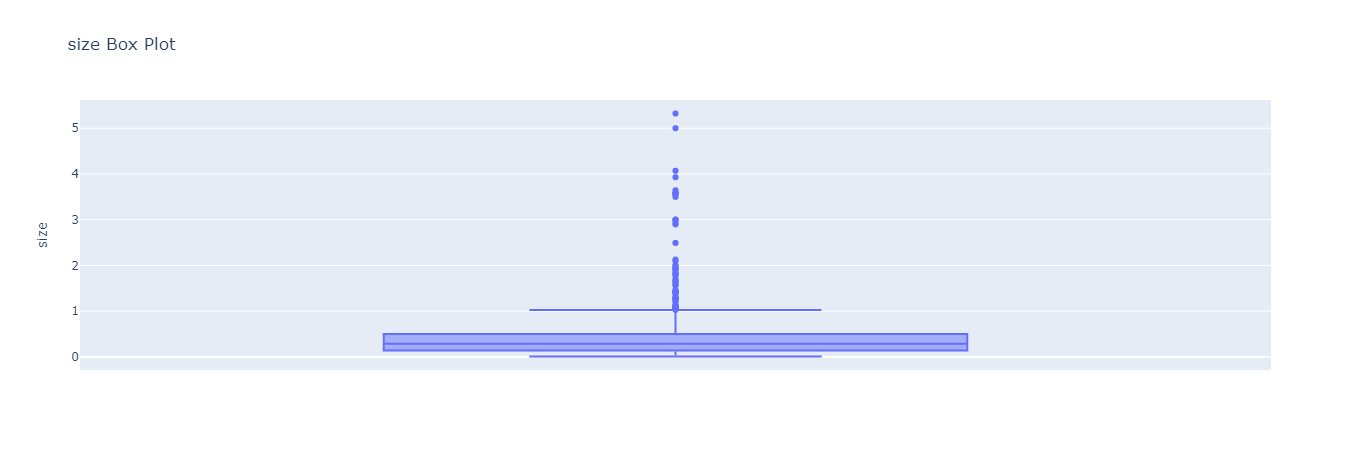



Plot : 1   status


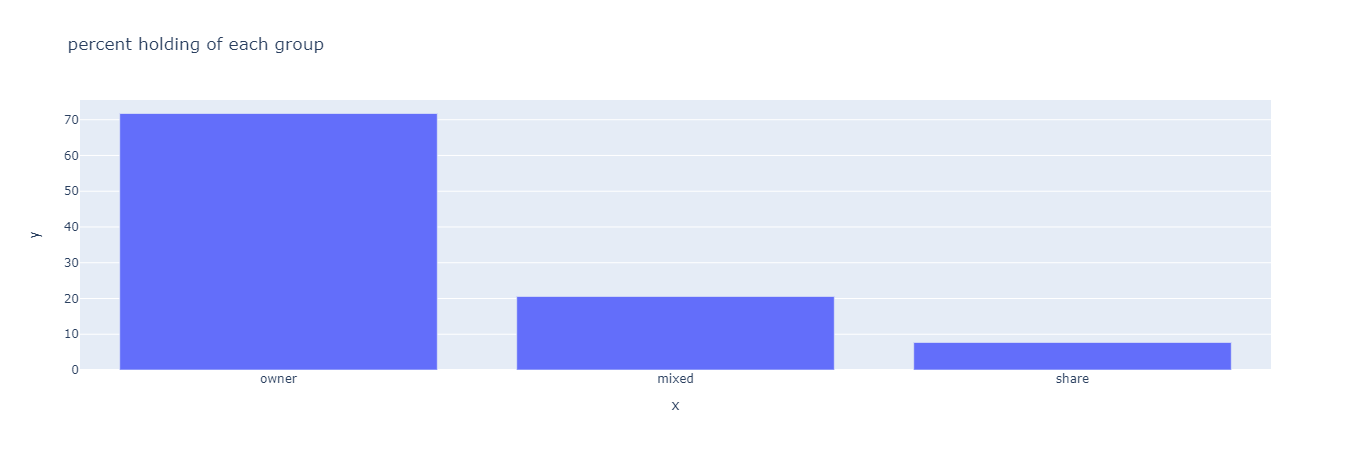



Plot : 2   varieties


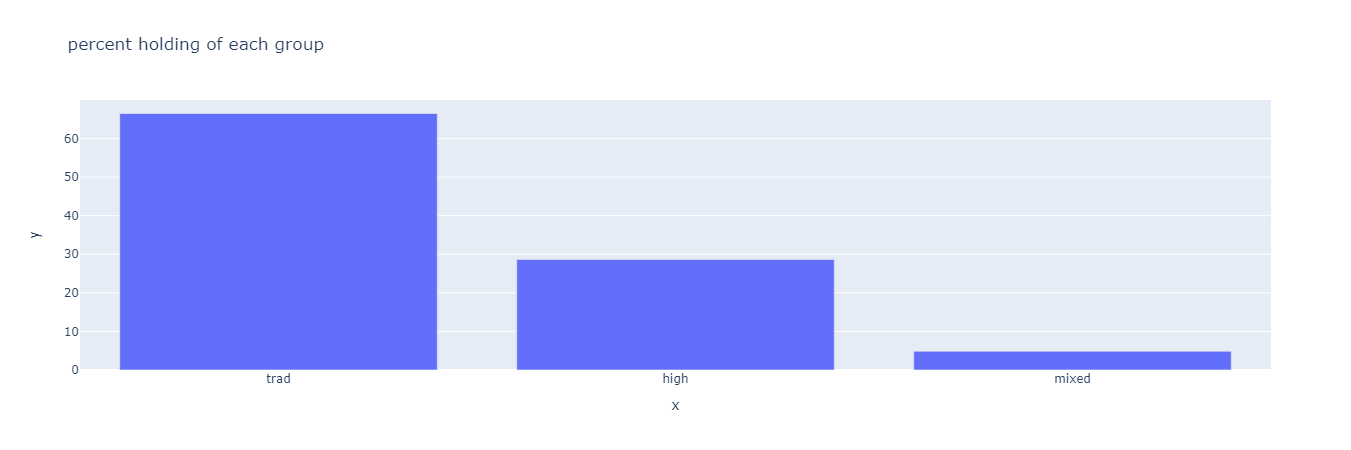



Plot : 3   bimas


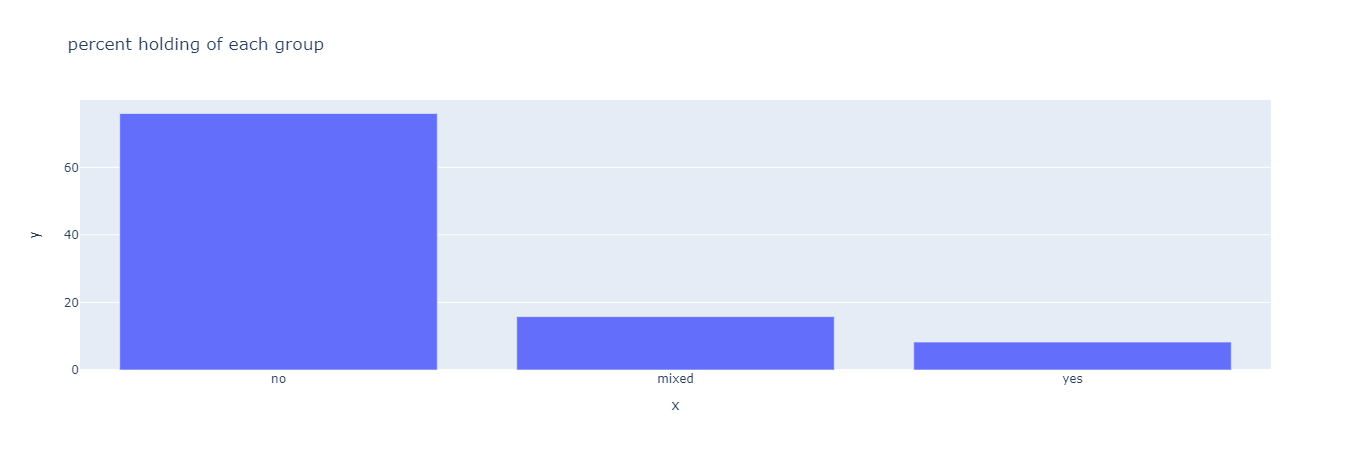



Plot : 4   seed


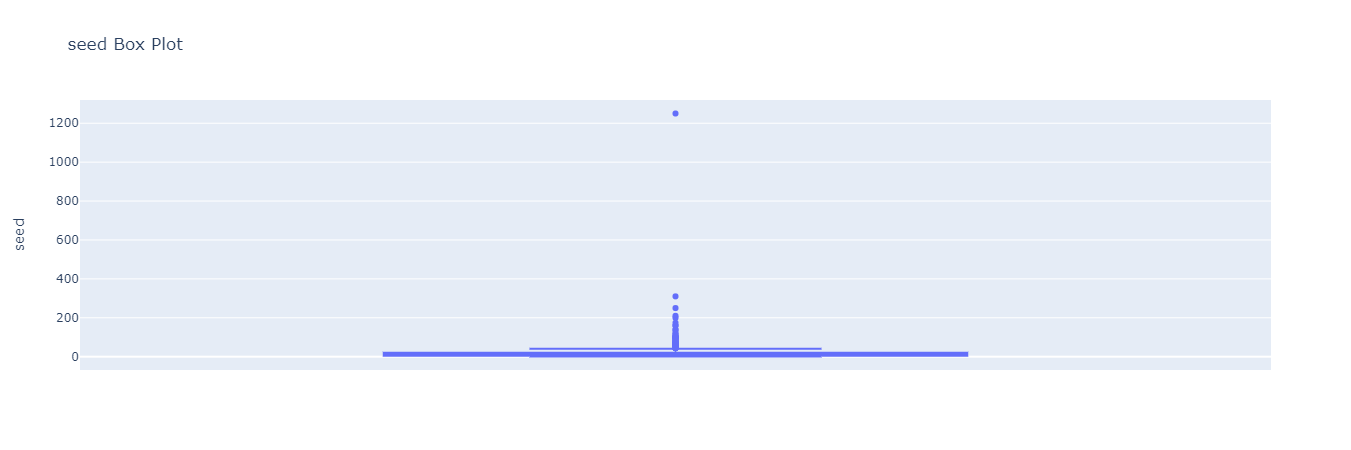



Plot : 5   urea


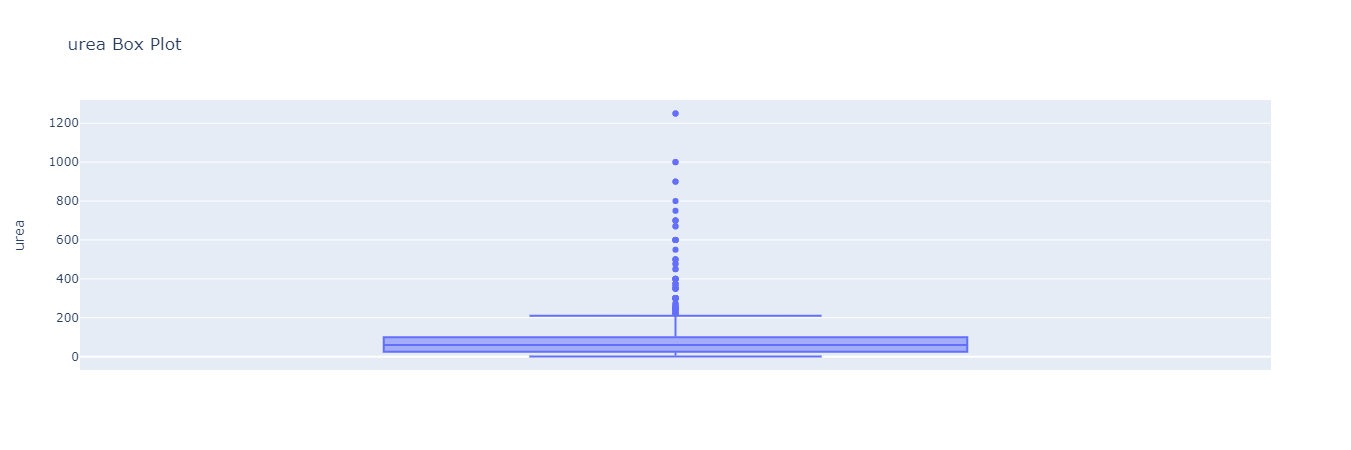



Plot : 6   phosphate


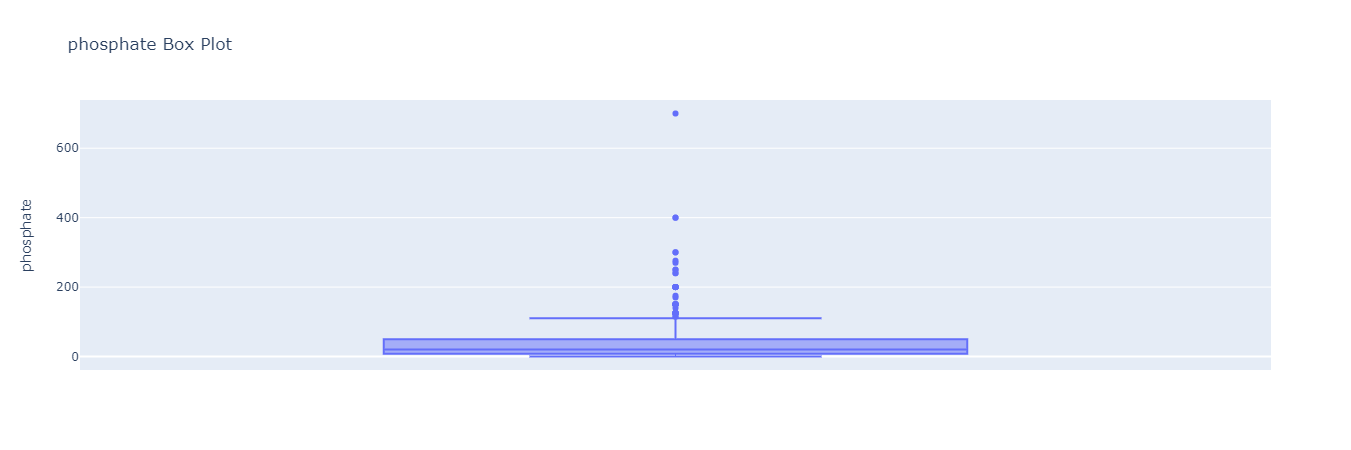



Plot : 7   pesticide


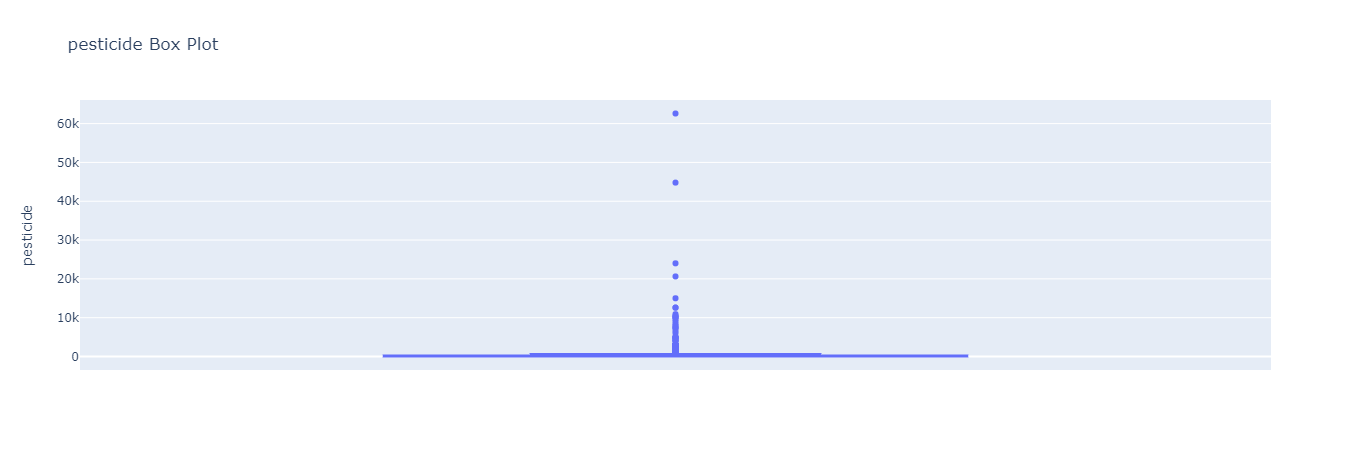



Plot : 8   pseed


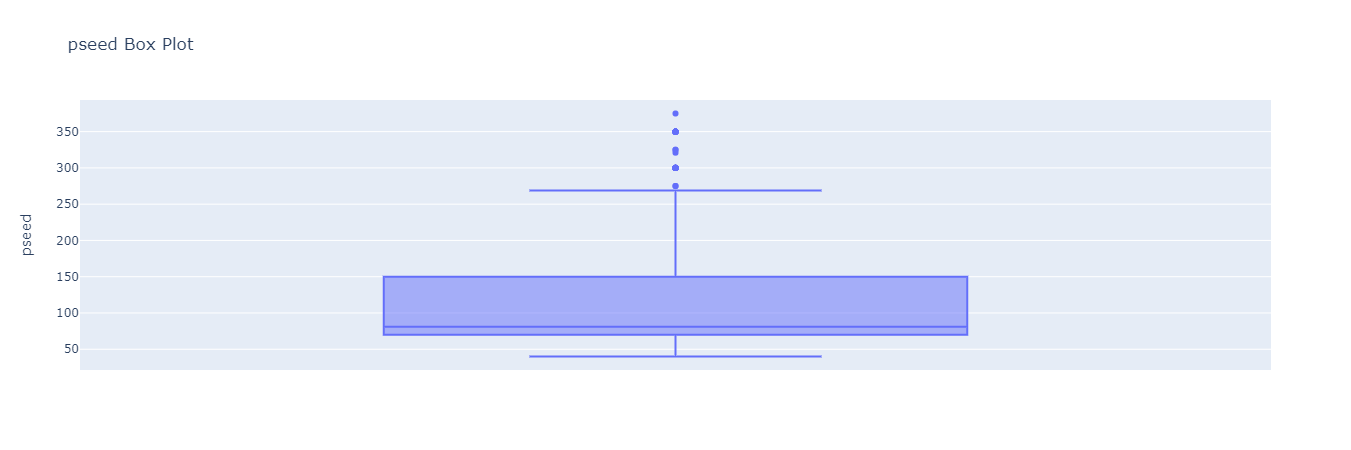



Plot : 9   purea


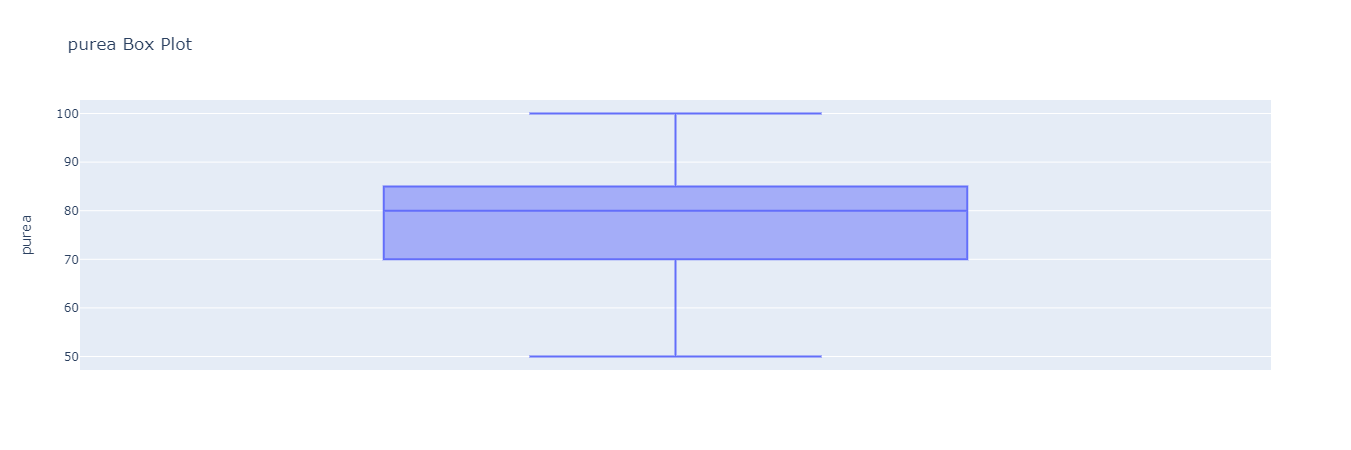



Plot : 10   pphosph


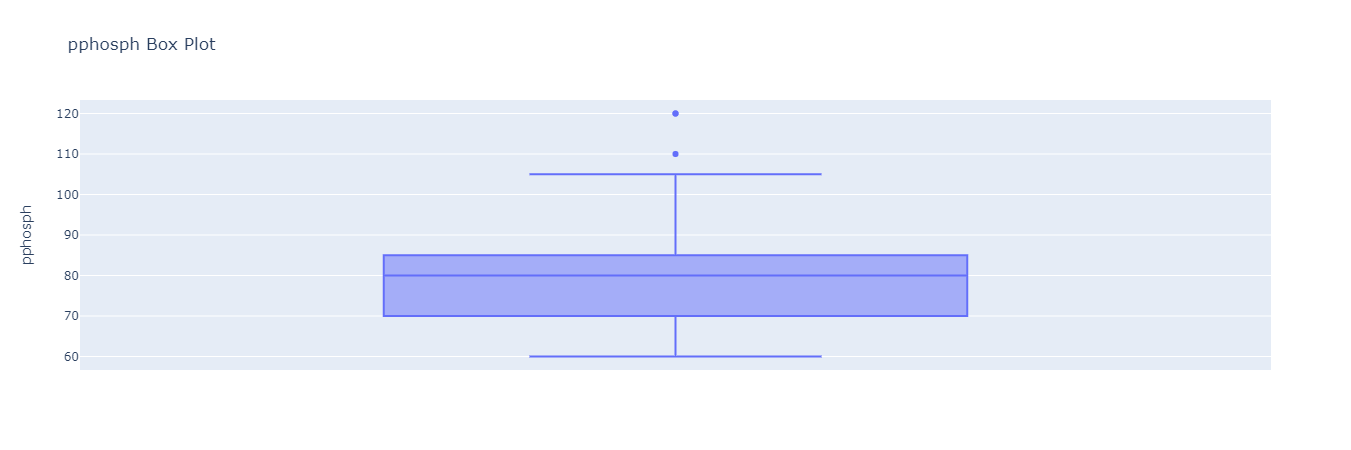



Plot : 11   hiredlabor


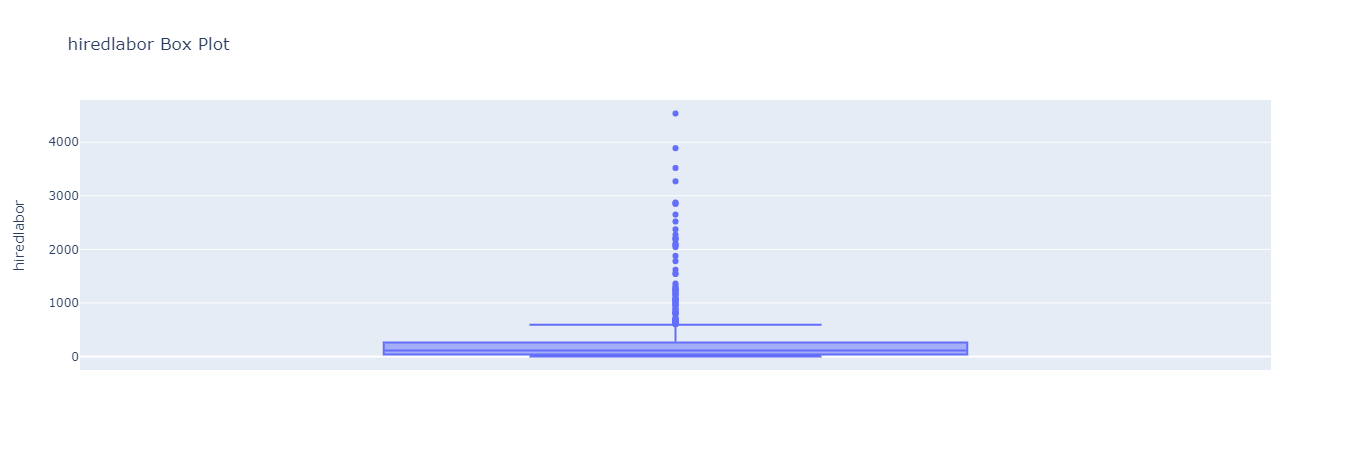



Plot : 12   famlabor


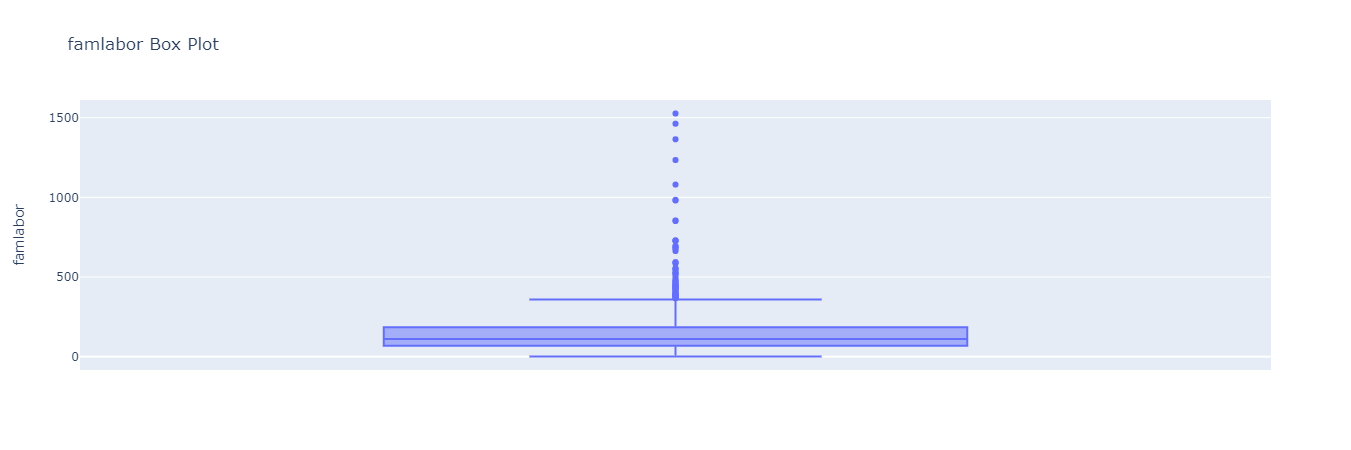



Plot : 13   totlabor


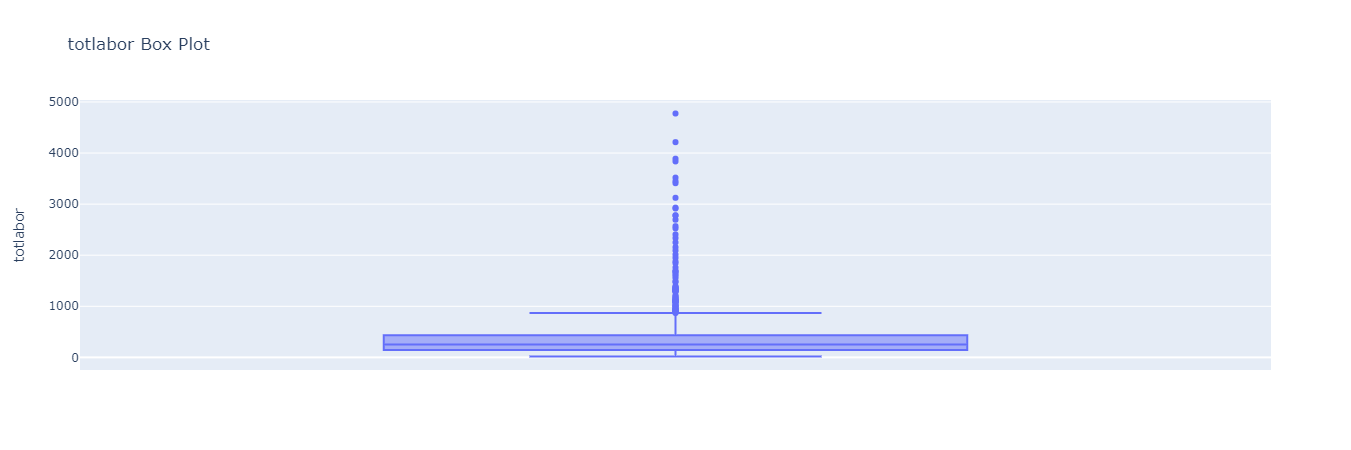



Plot : 14   wage


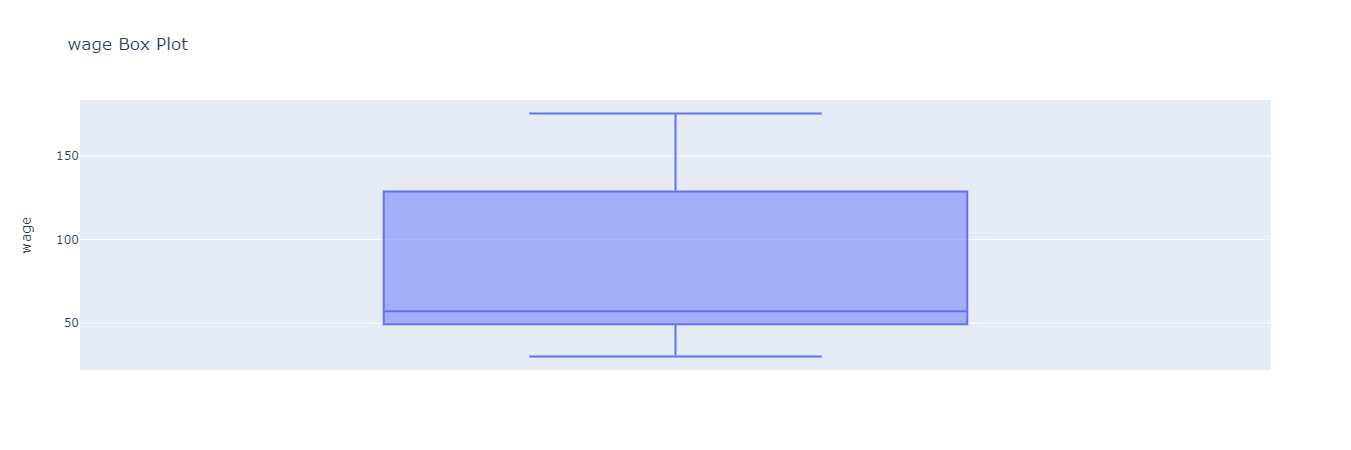



Plot : 15   goutput


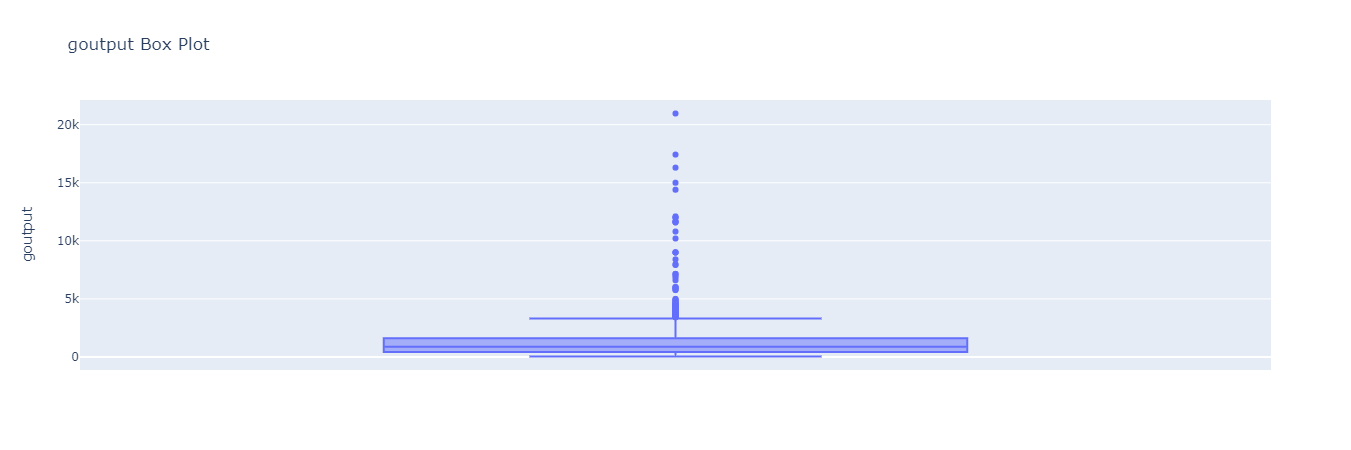



Plot : 16   noutput


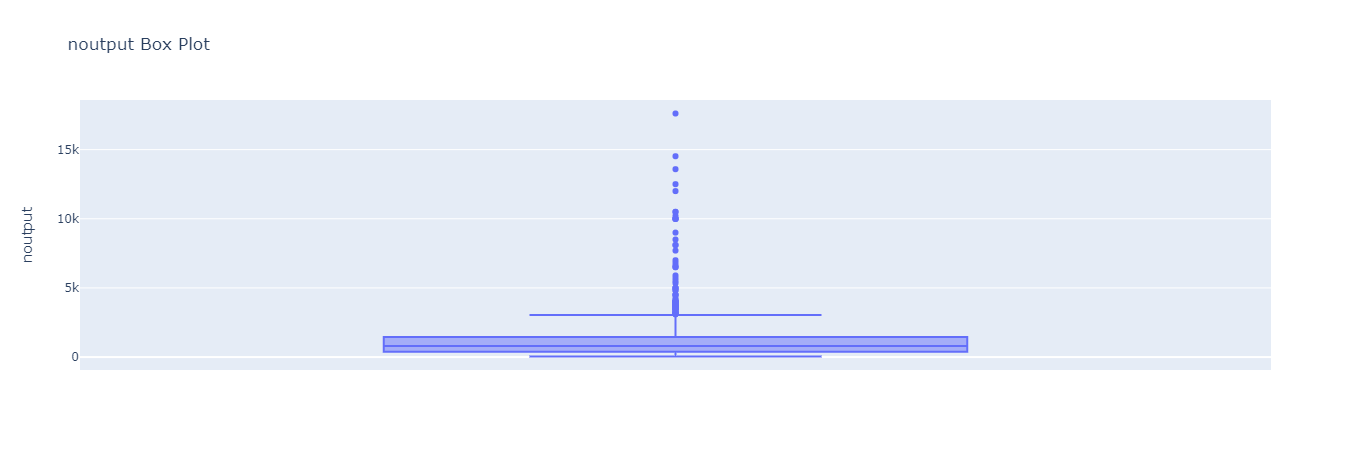



Plot : 17   price


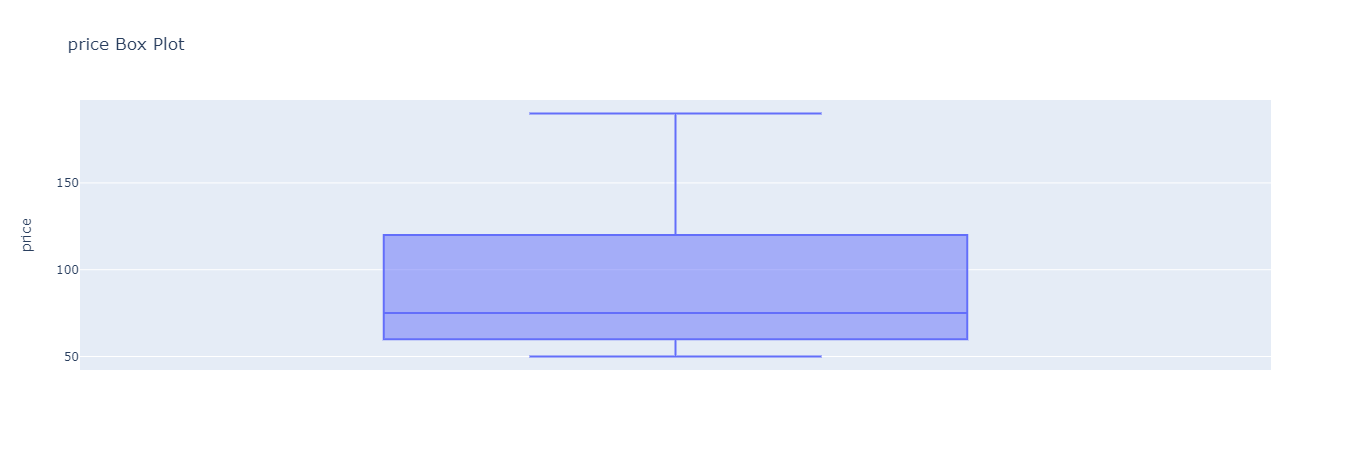



Plot : 18   region


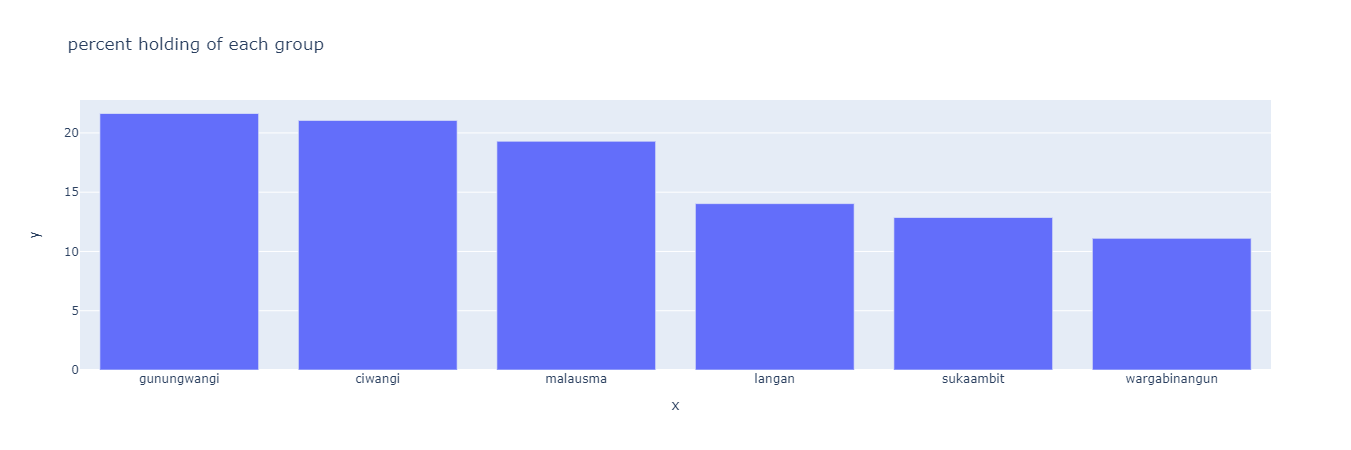



Plot : 19   gross_op_per_hectare


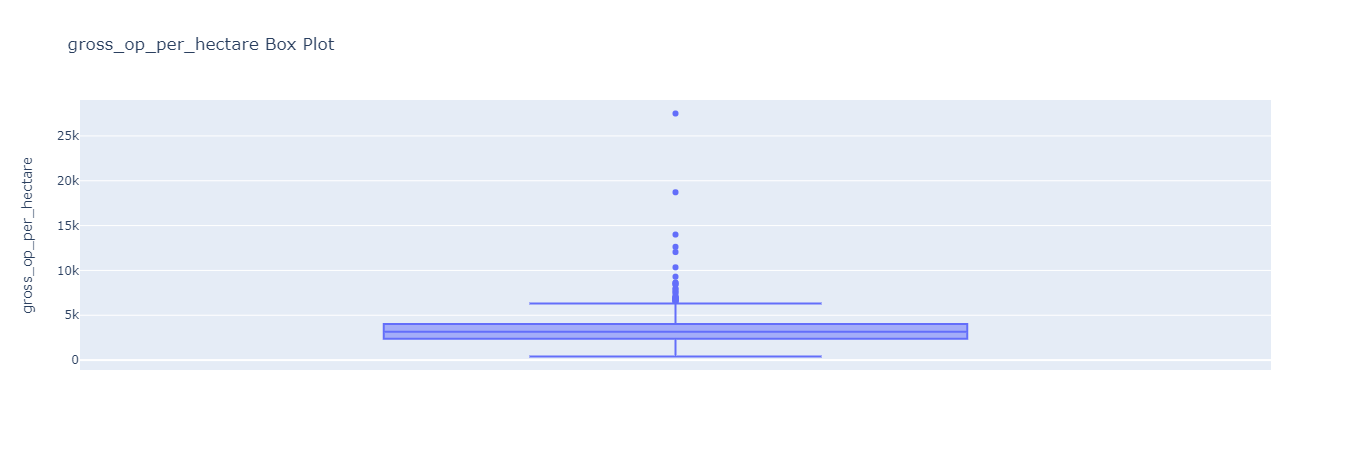



Plot : 20   spending_on_raw_materials


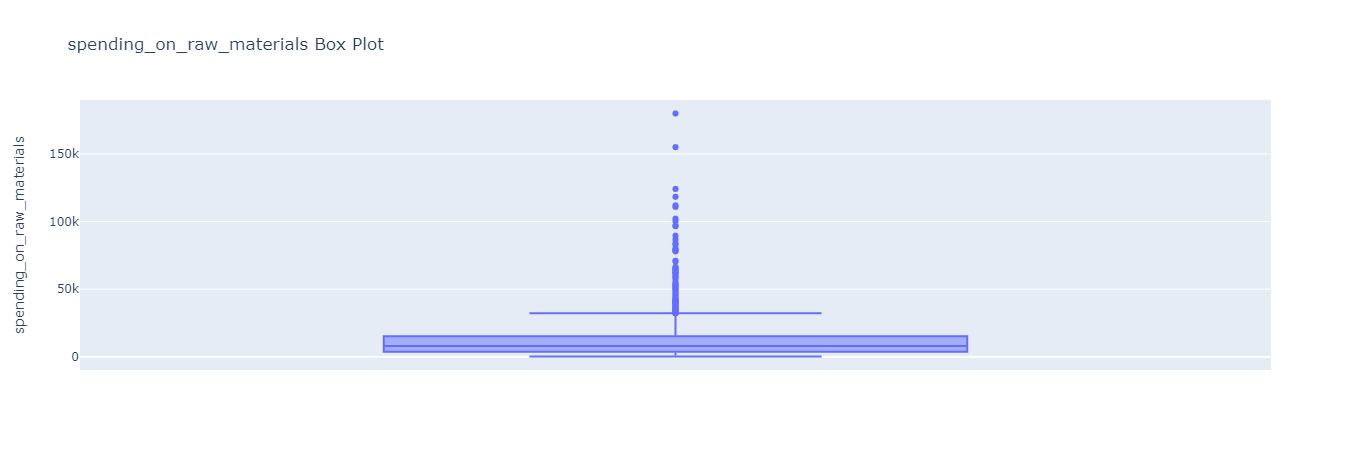



Plot : 21   spending_per_hectare


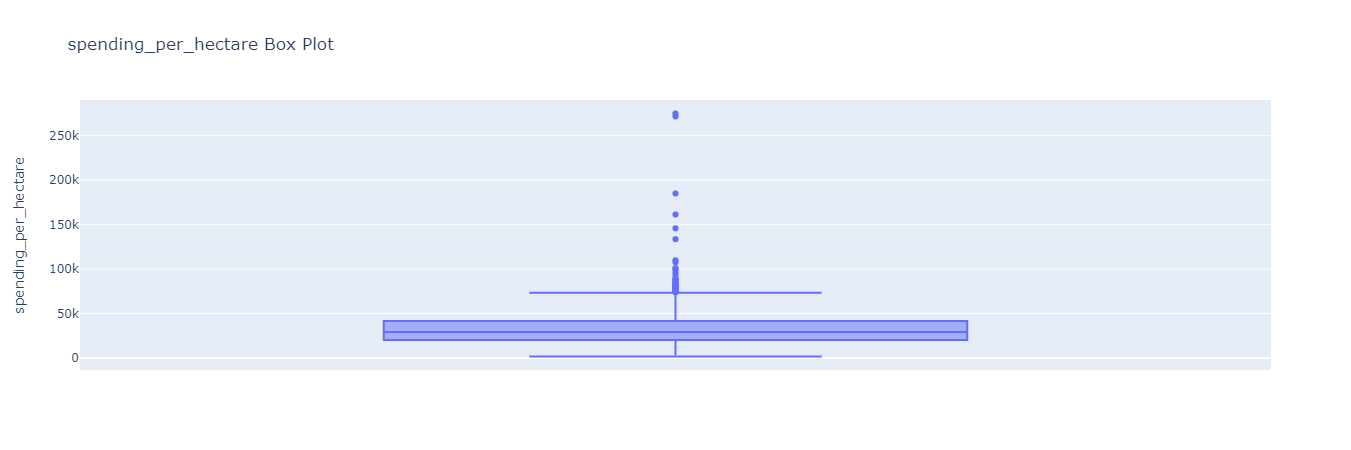

In [107]:
# Univariate Analysis of all columns:

for i,col in enumerate(data.columns):
    print('Plot :',i,' ',col)
    
    if data[col].dtype == 'float64':
        fig = px.box(data, y = col, title= col+' Box Plot')
        fig.show()
    
    if data[col].dtype == 'object':
        
        vl = data[col].value_counts(normalize=True) 
        fig = px.bar( x= vl.index, y=(vl.values)*100, title= 'percent holding of each group')
        fig.show()

    print('')
    print('')

> UniVariate Analysis
   1. 11 of 19 features are Right-Skewed, If we prefer to use Linear Models then we should transform the data. (ref plots : 0,4,5,6,7,11,12,13,15,16,19)
   2. 72% of Data/Crop is operated by Individual owners or Lease holders. The decisions taken while cultivating are made by an Individual or from Single Family. (ref plot : 1)
   3. 66% of Data/Crop are Traditional Varieties and 28% are High yield Varieties. Varieties may include cropping techniques such as type of seeds used, methods used while cultivating and    harvesting, time period and etc.. (ref plot : 2)
   4. 76% of farmers are not a part of bimas program, Bimas(masss guidance for food self sufficiency) is  is an intensification program  ([about BIMAS](http://www.ide.go.jp/library/English/Publish/Periodicals/De/pdf/80_01_02.pdf)) only 8.2% are part of it. (ref plot : 3)
   5. 3 Regions(Gunungwangi,Malausma,Ciwangi) account for 60% share,each ~20% and each other region account for less than 15% of share. (ref plot : 18)
   6. Median  crop output  per hectare of land is 3159 kgs. The values greater than upper fence(6,315) accounts for values whose land size is less than 0.05 hectare and output is more than usual.(ref plot : 19)

Plot : num_0   size


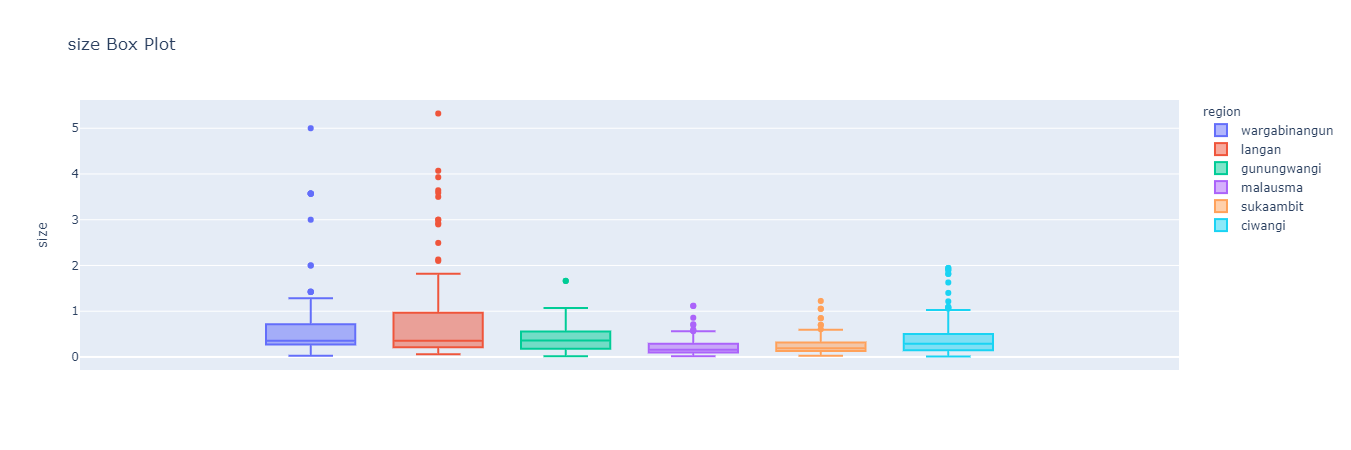

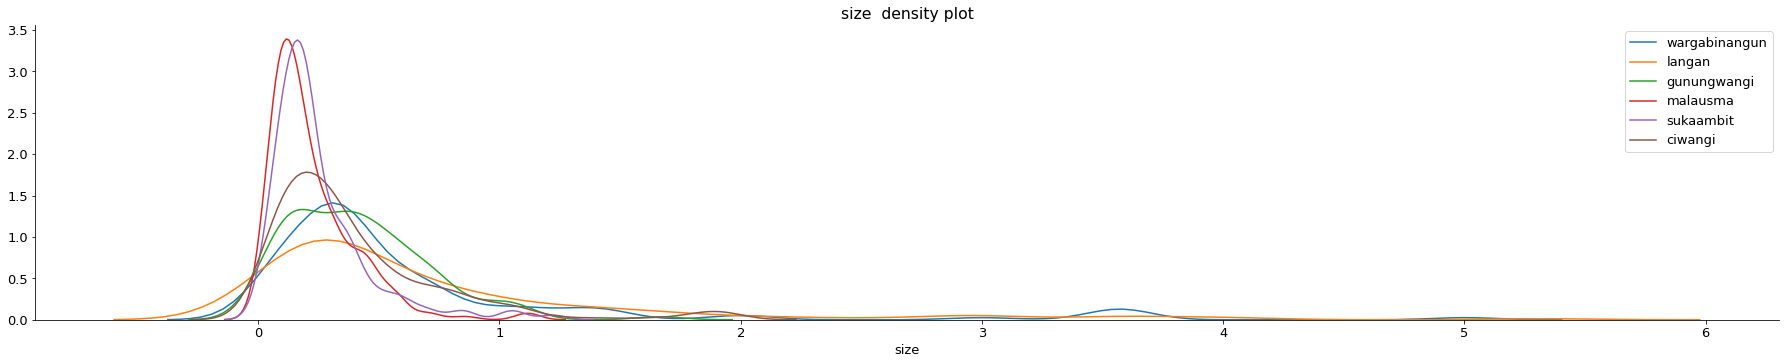



Plot : num_1   seed


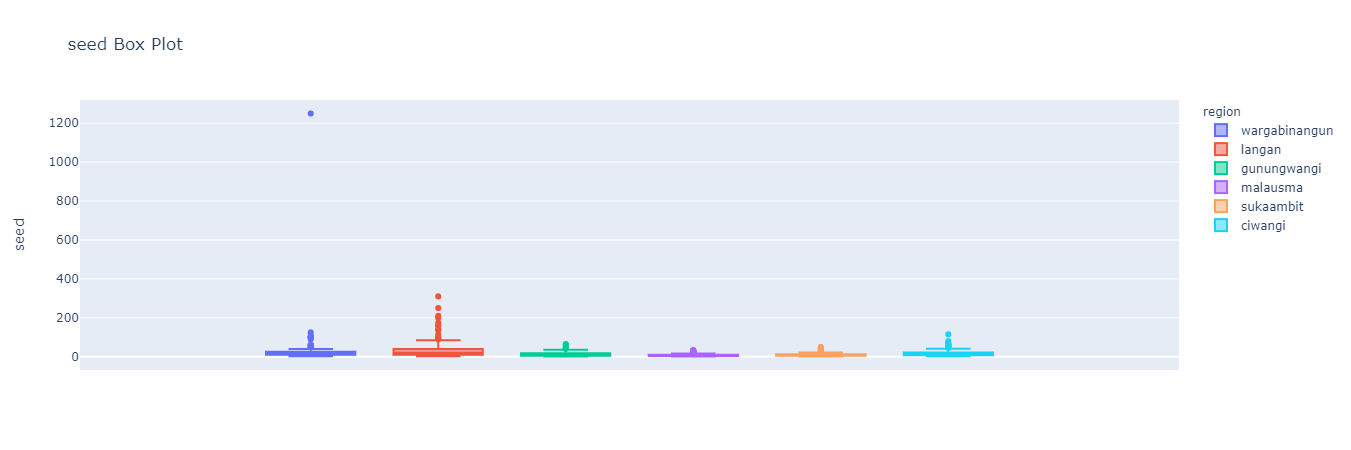

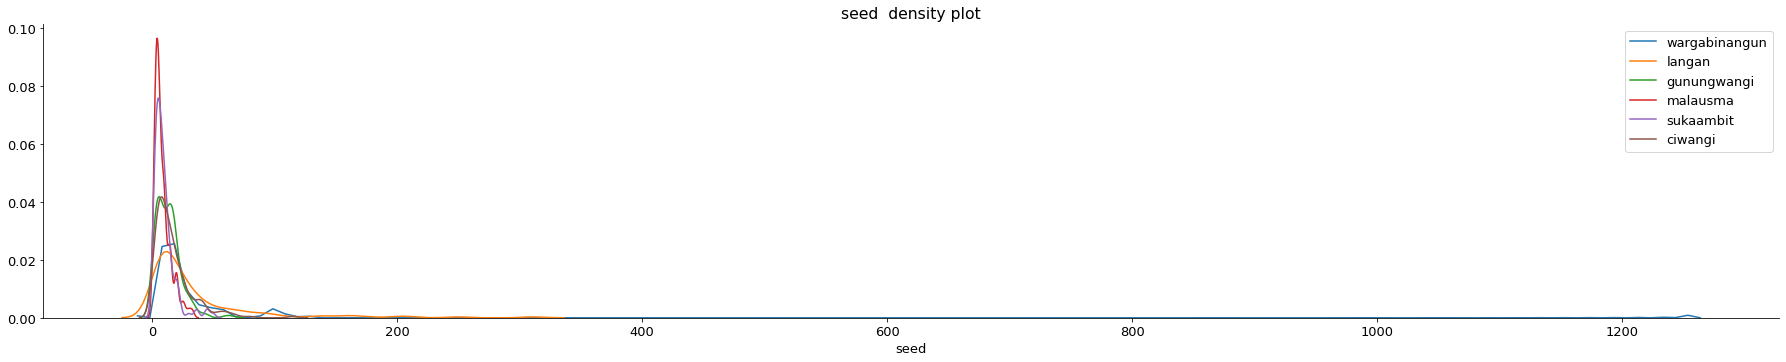



Plot : num_2   urea


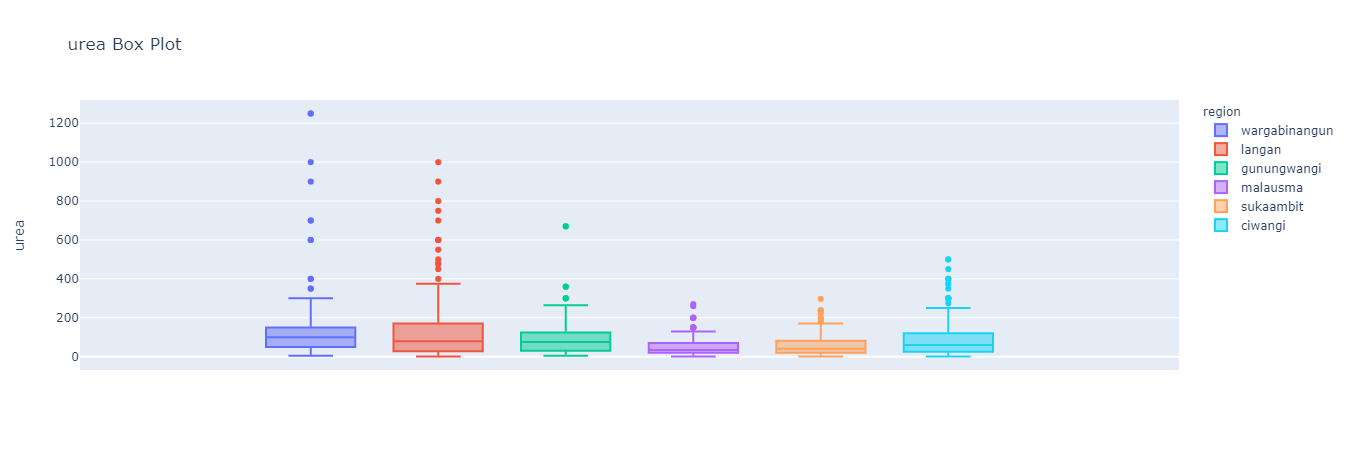

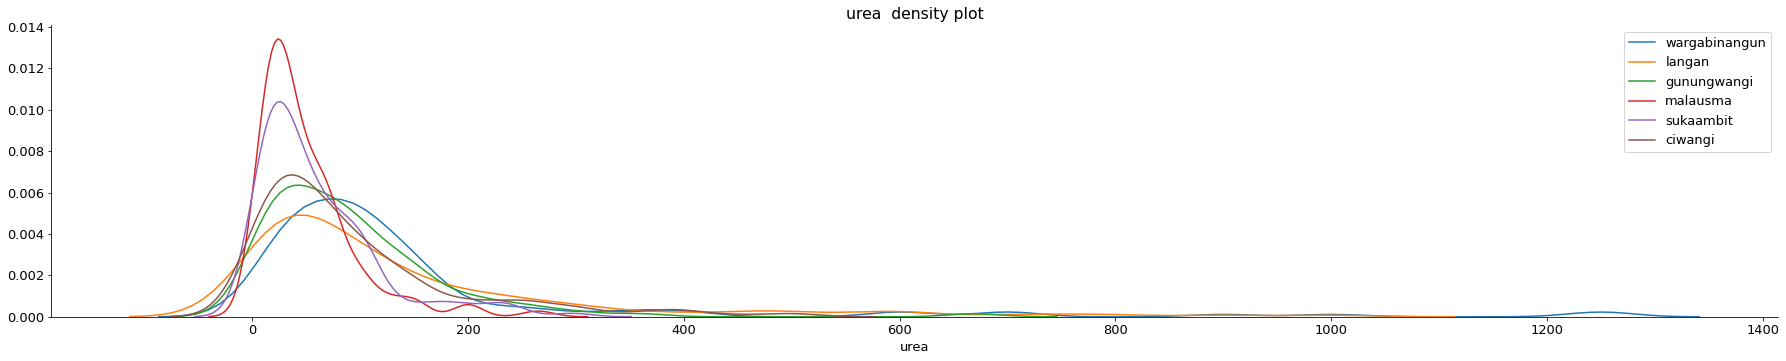



Plot : num_3   phosphate


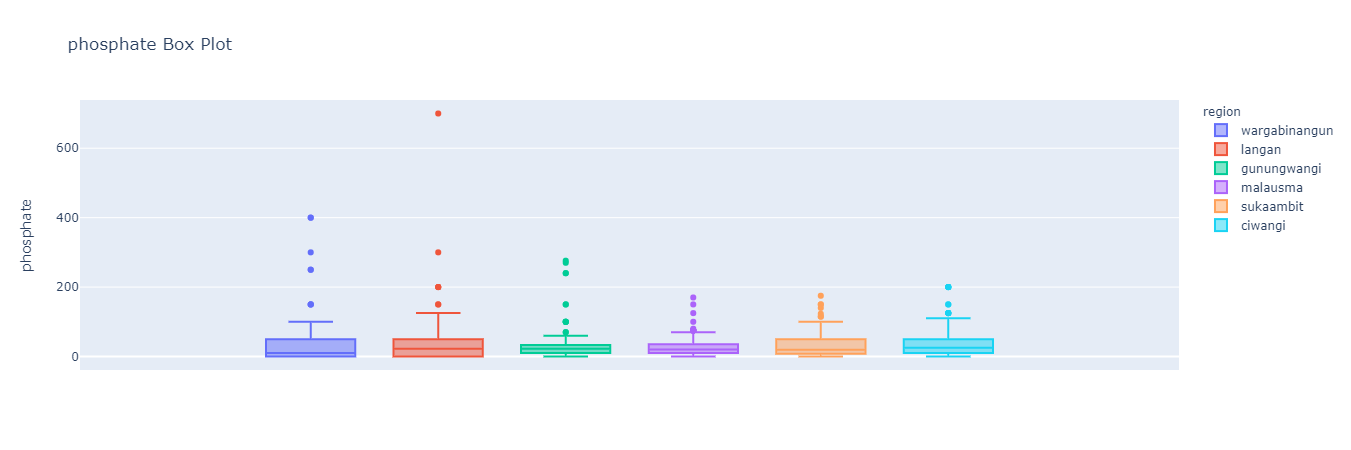

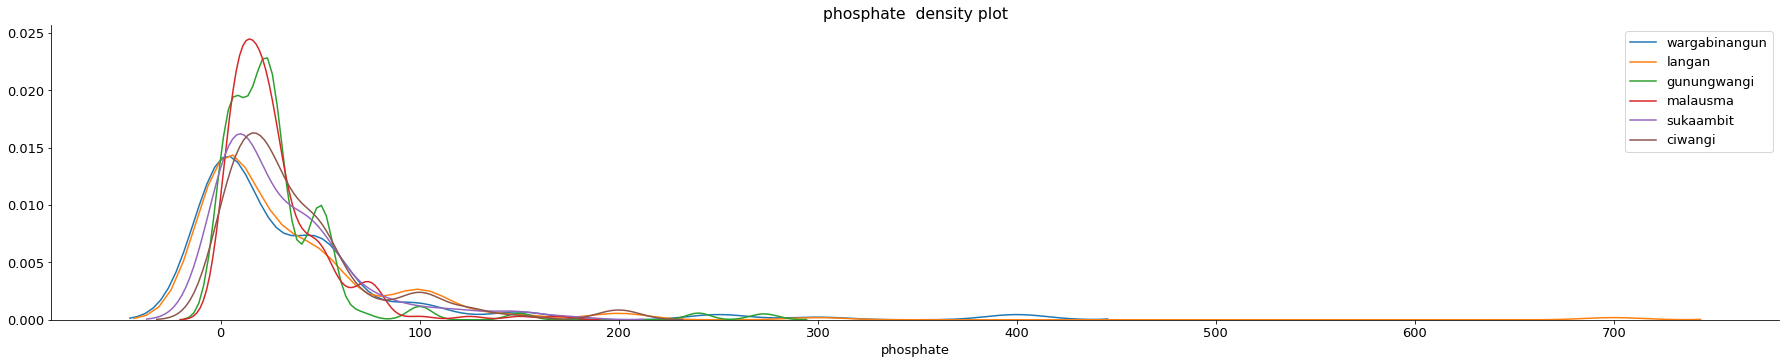



Plot : num_4   pesticide


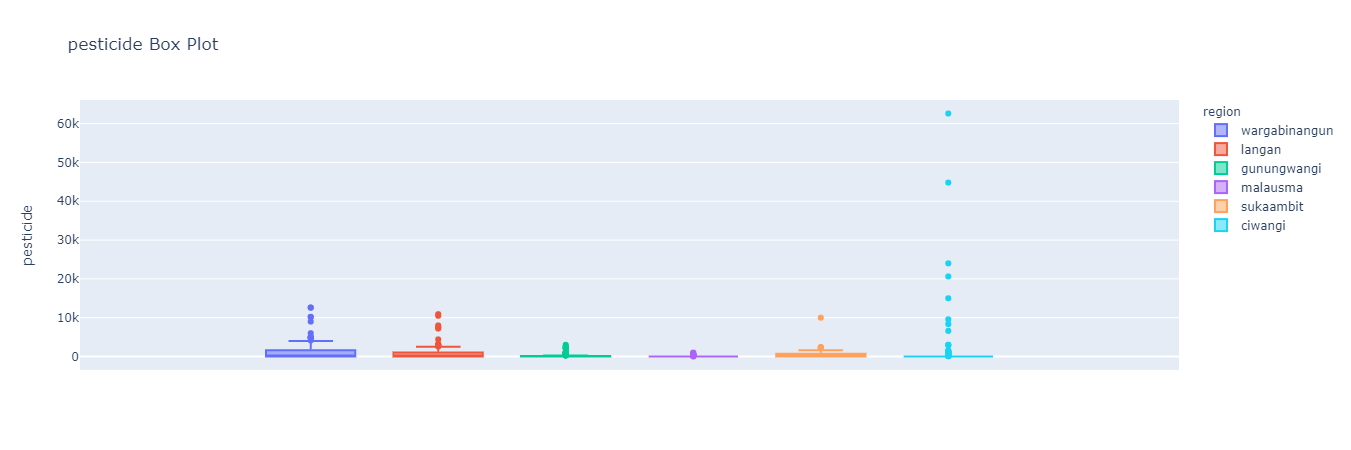

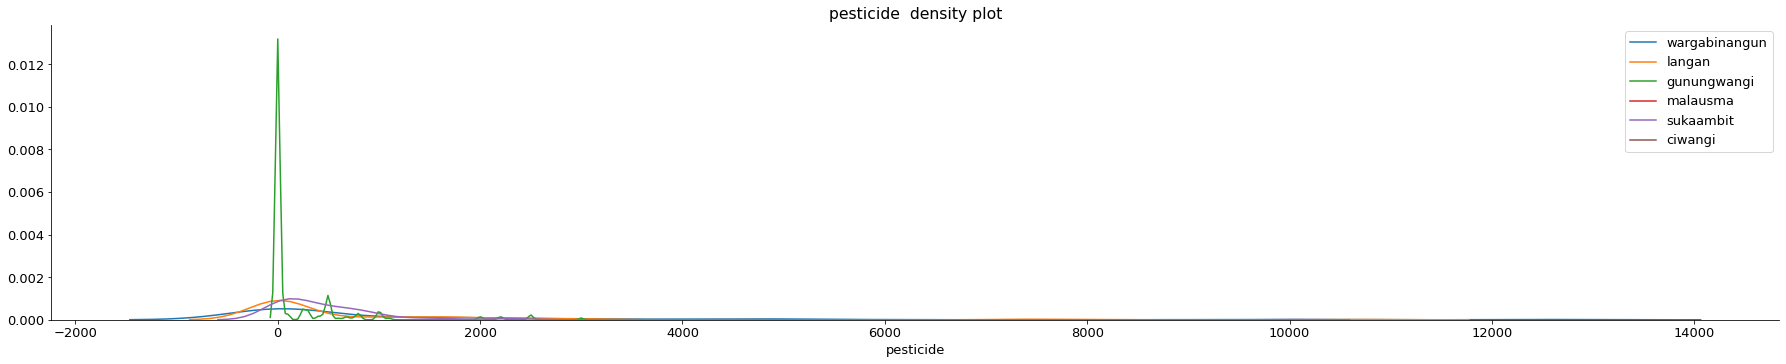



Plot : num_5   pseed


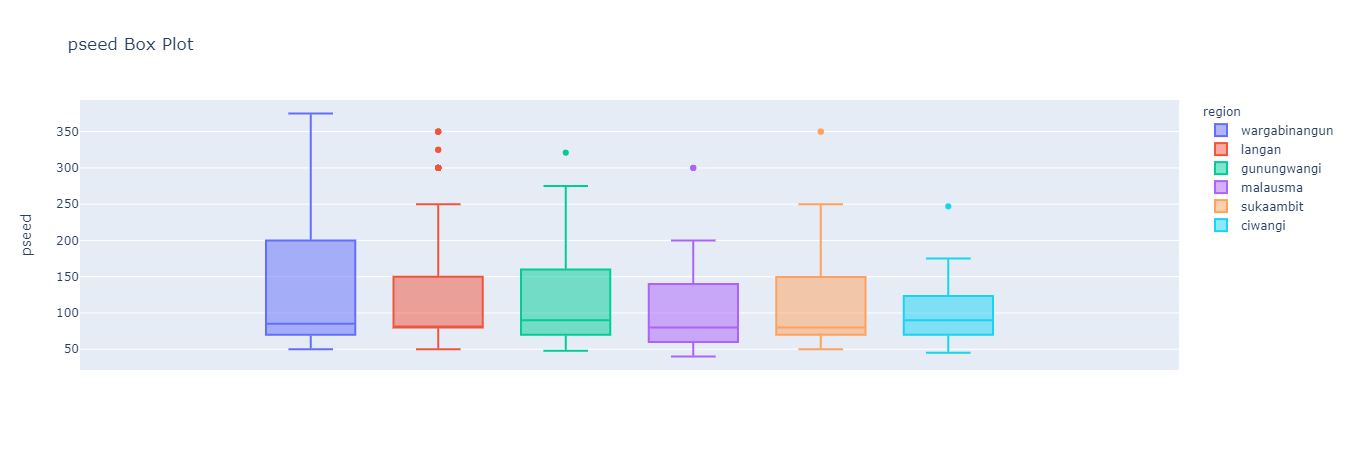

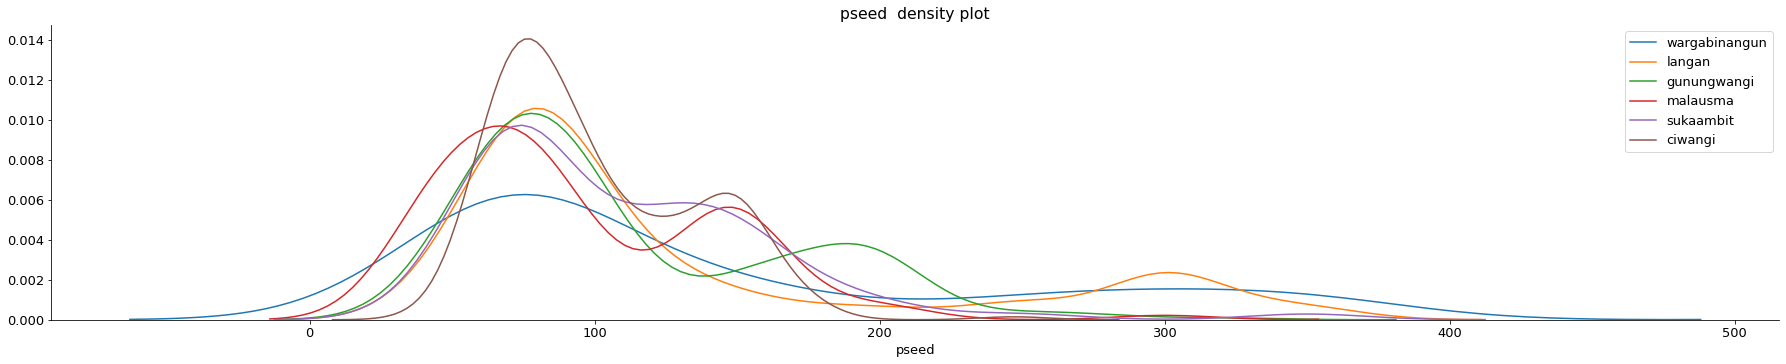



Plot : num_6   purea


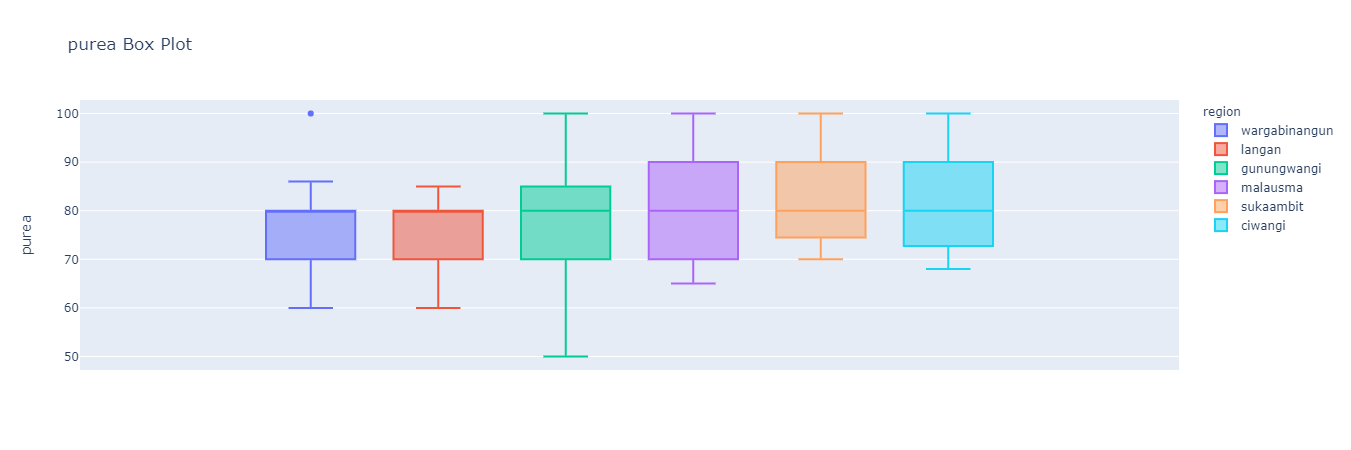

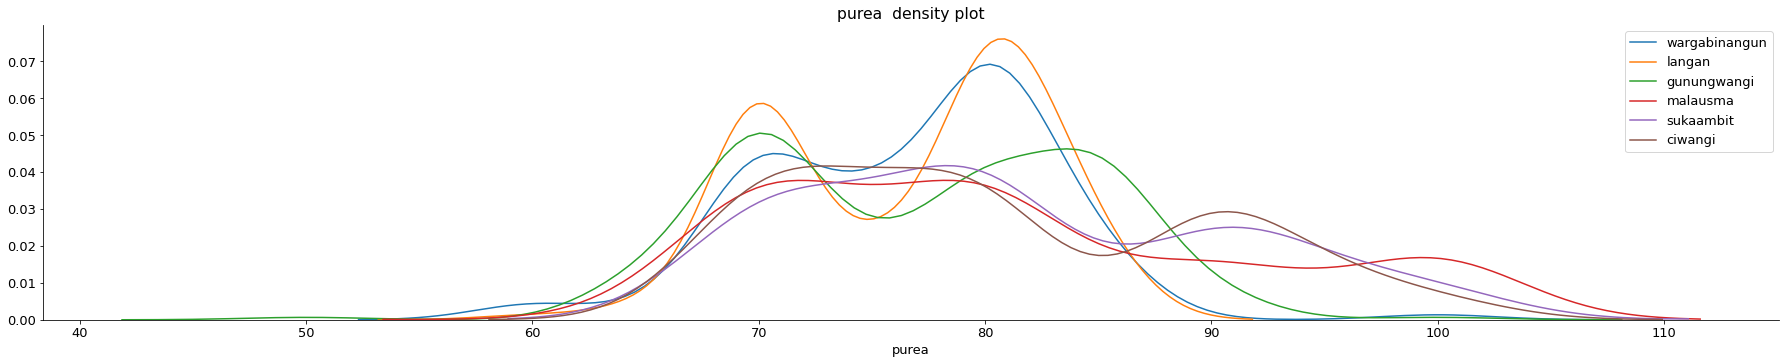



Plot : num_7   pphosph


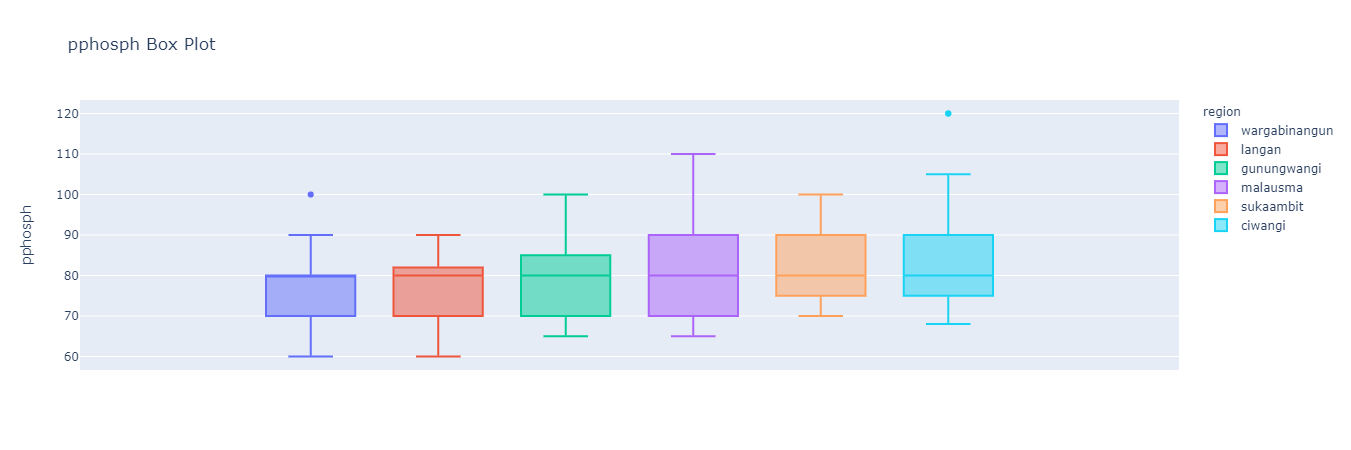

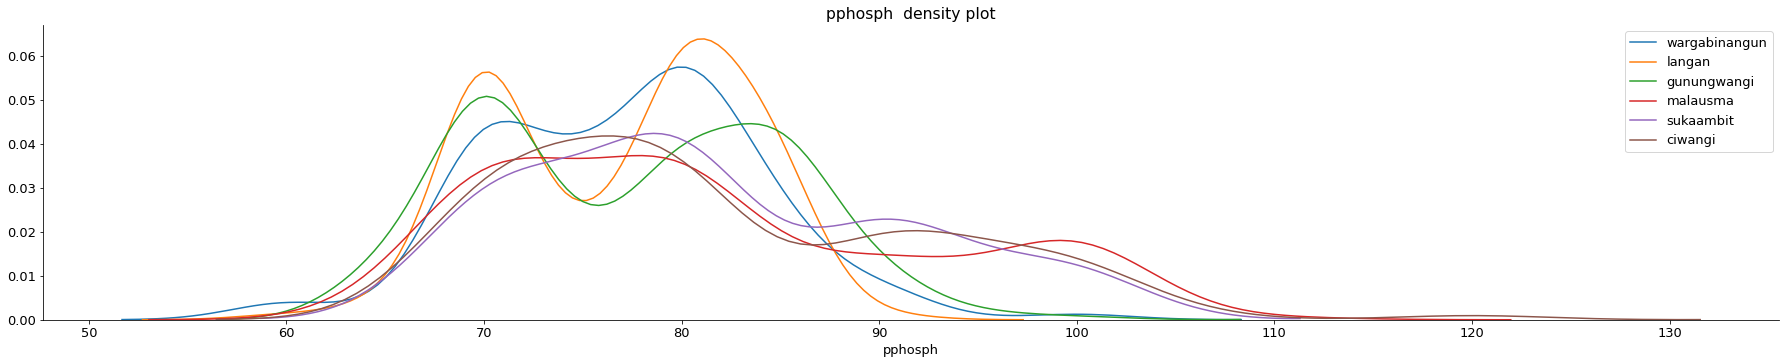



Plot : num_8   hiredlabor


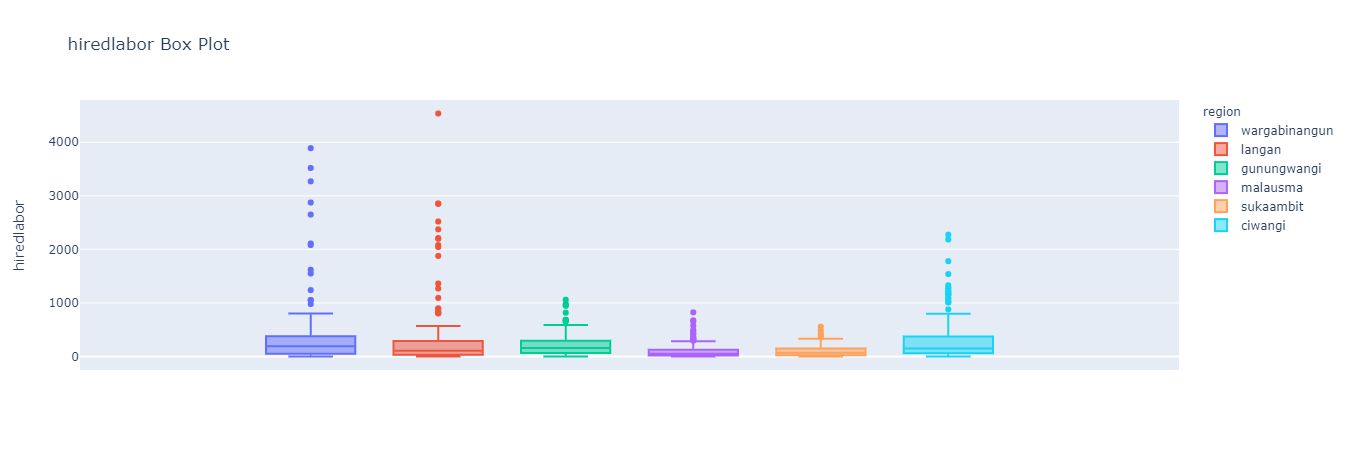

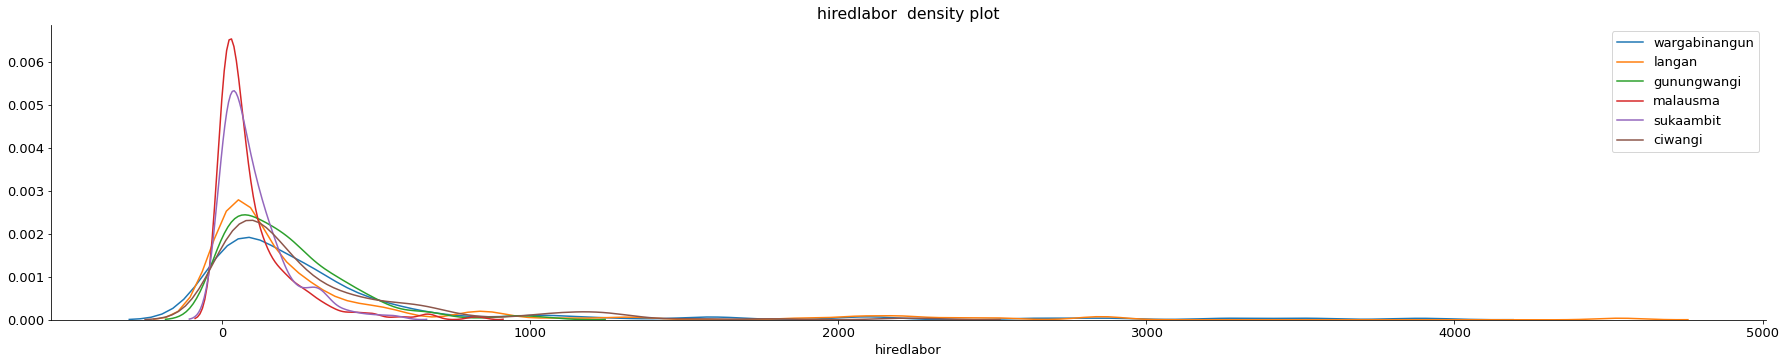



Plot : num_9   famlabor


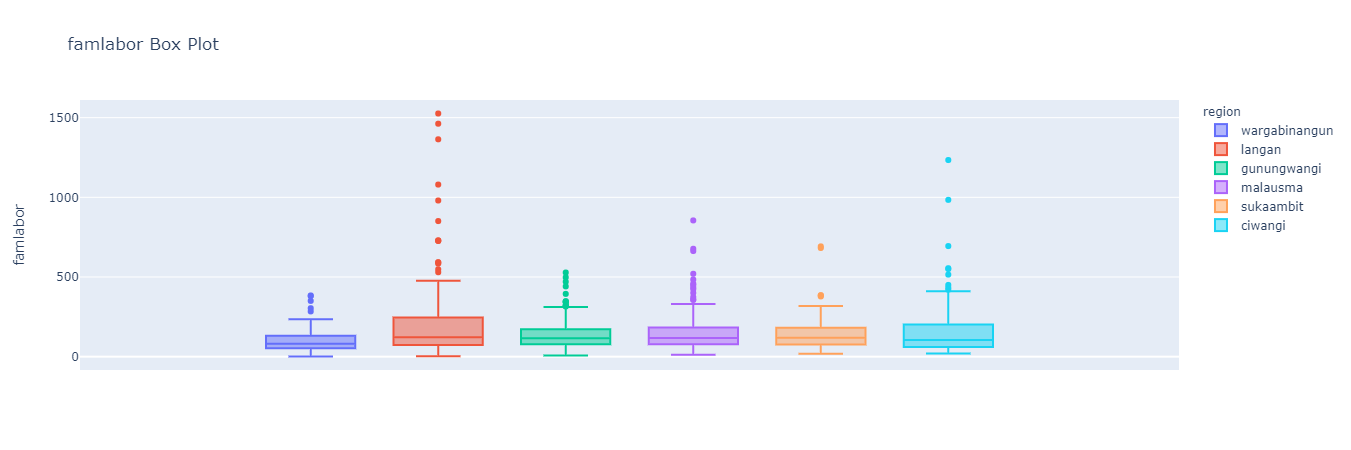

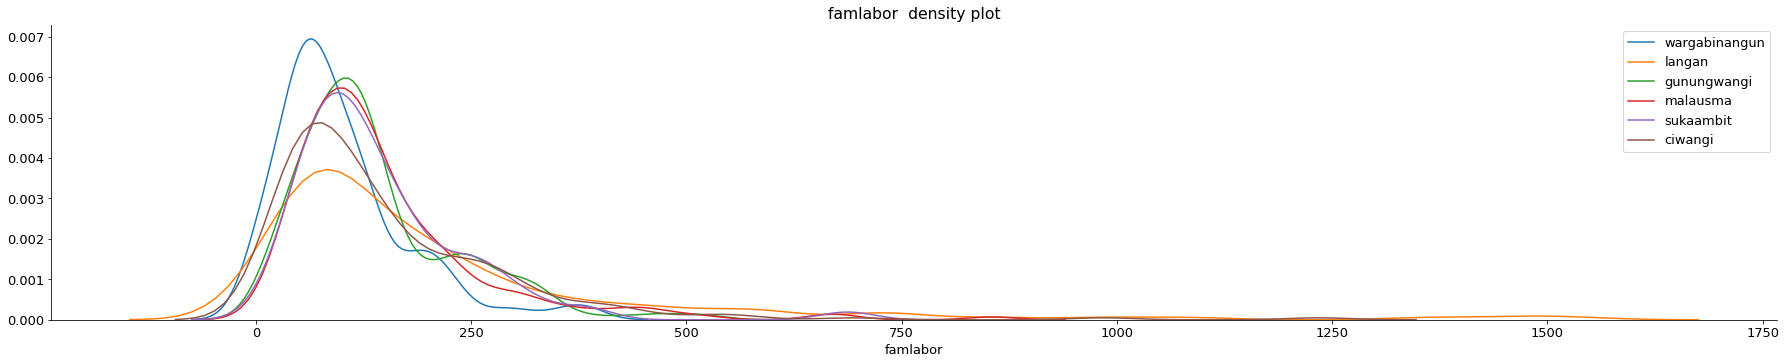



Plot : num_10   totlabor


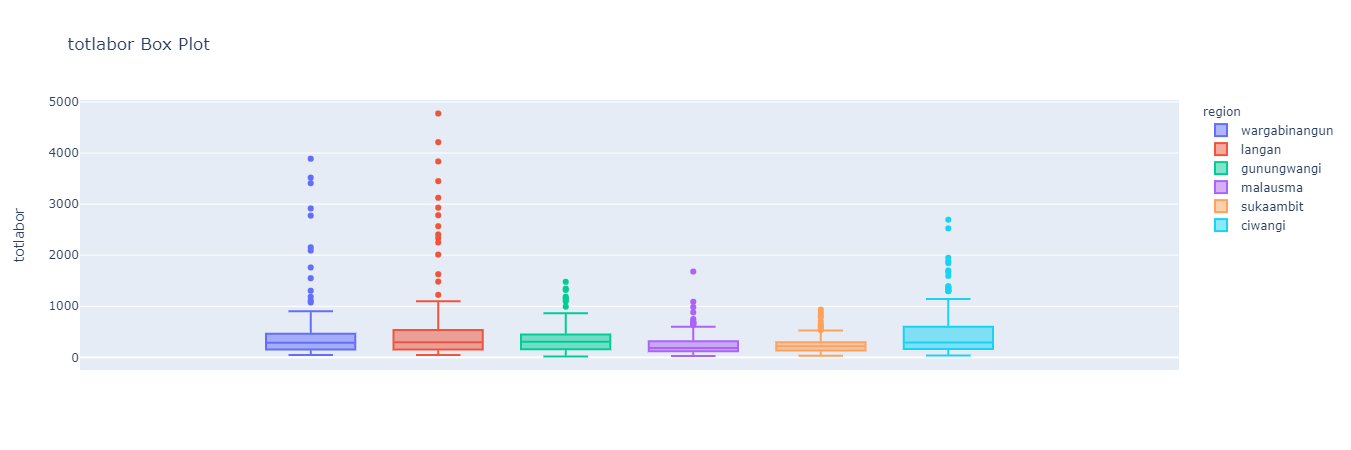

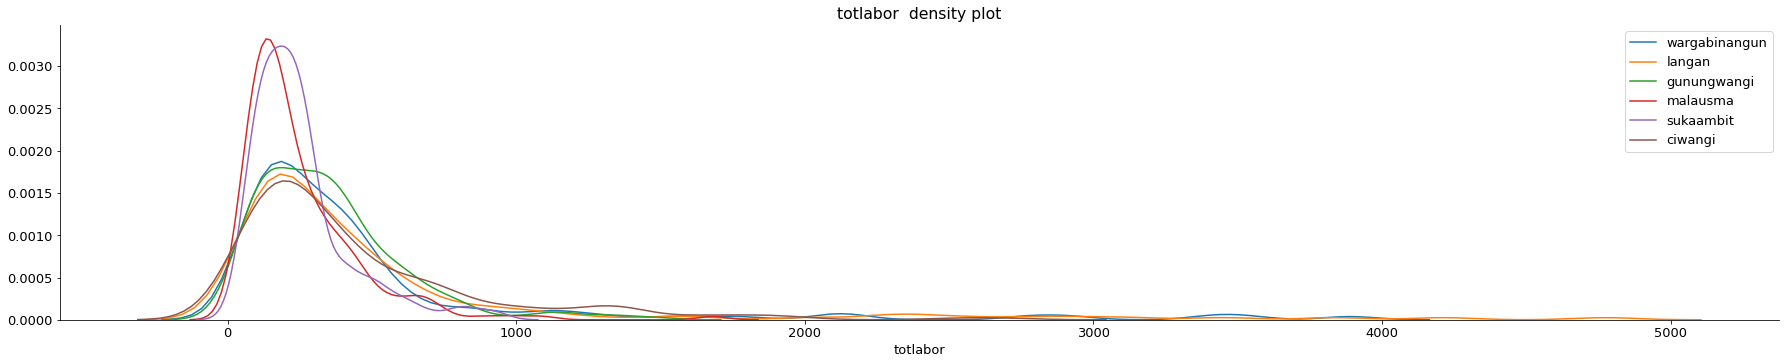



Plot : num_11   wage


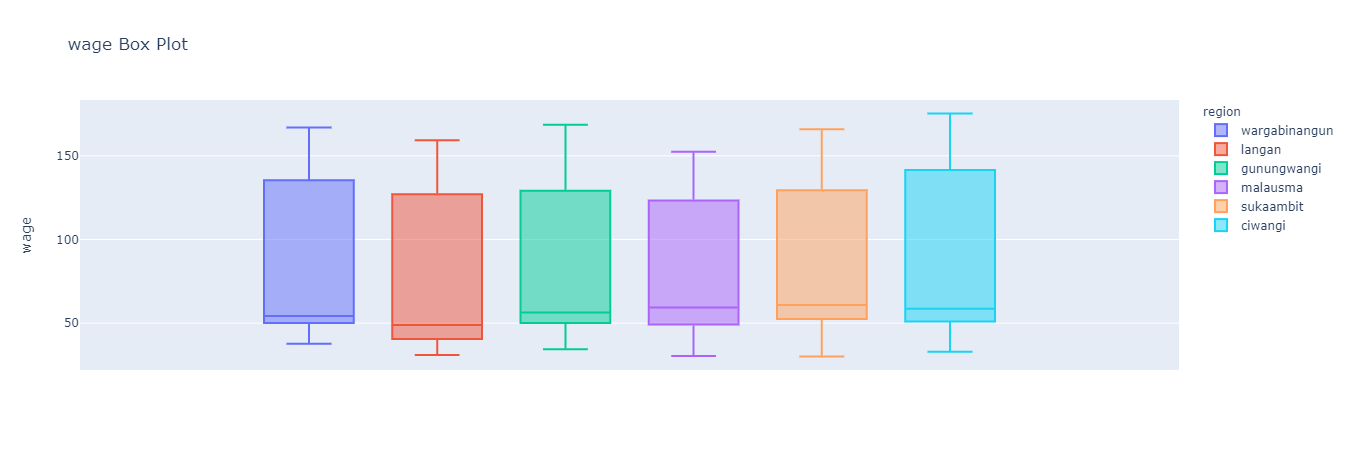

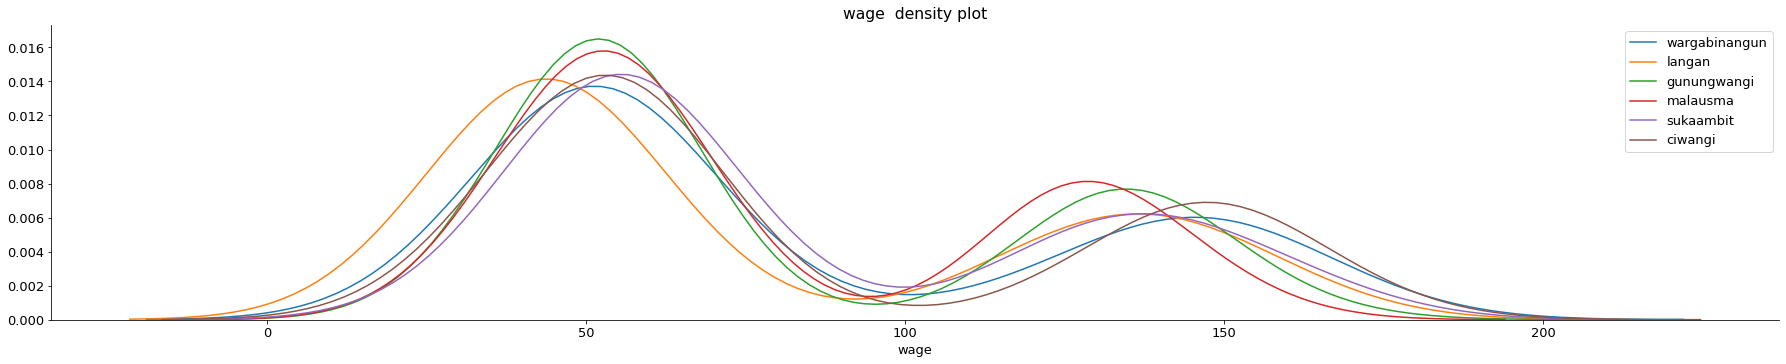



Plot : num_12   goutput


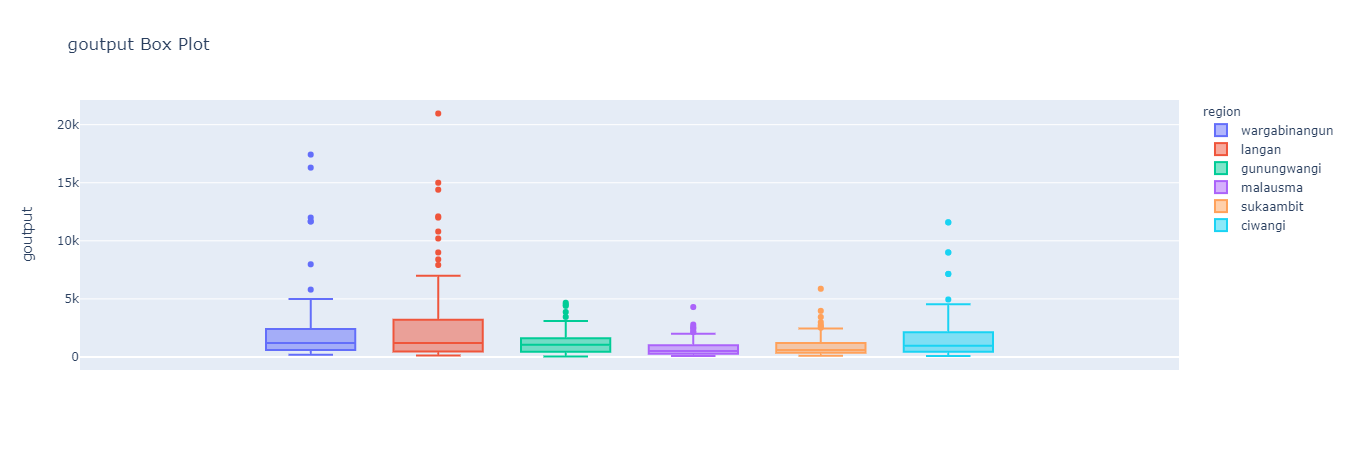

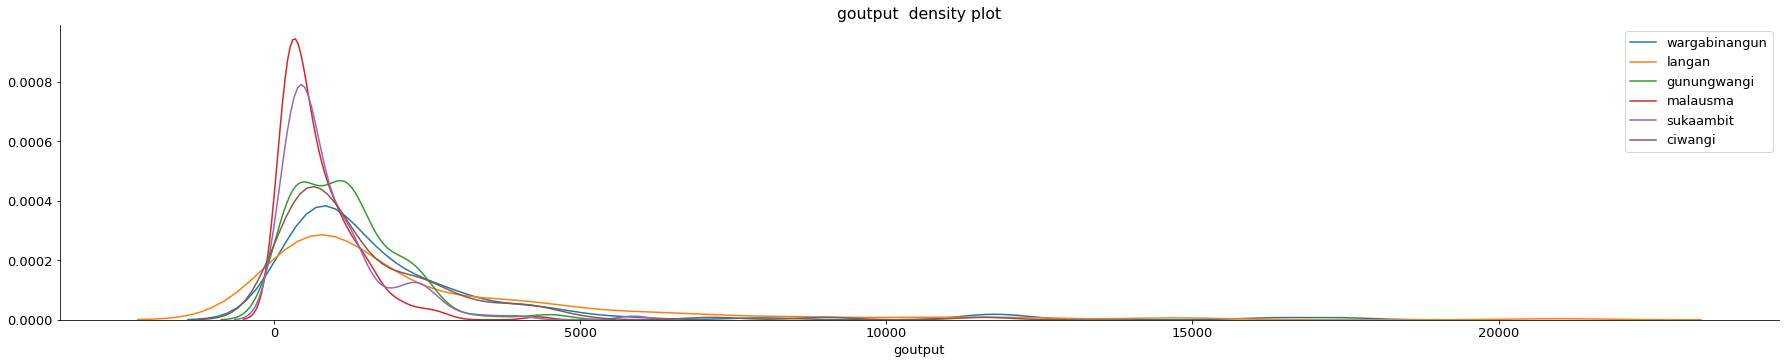



Plot : num_13   noutput


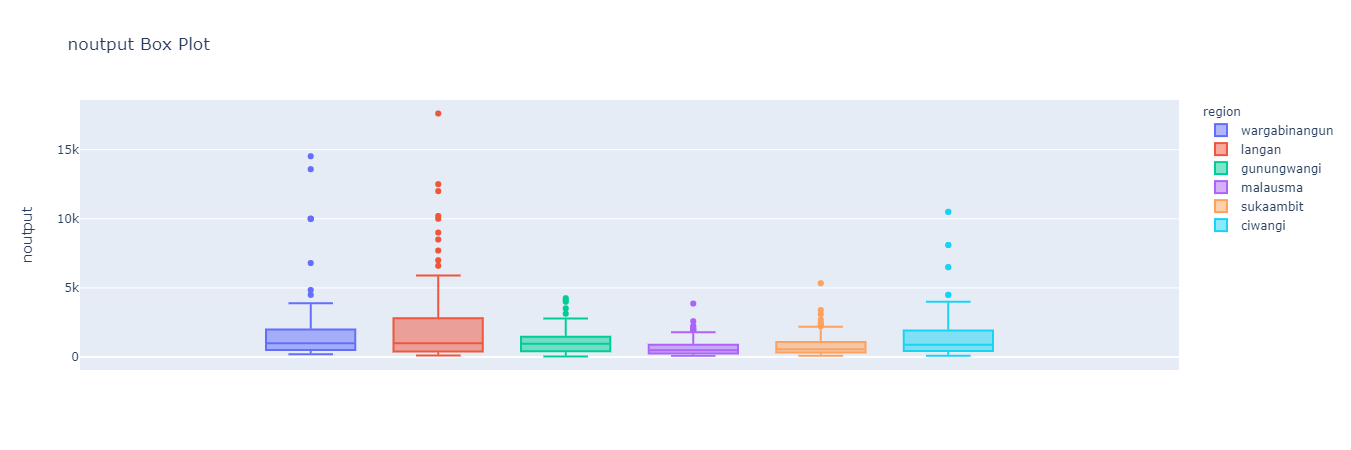

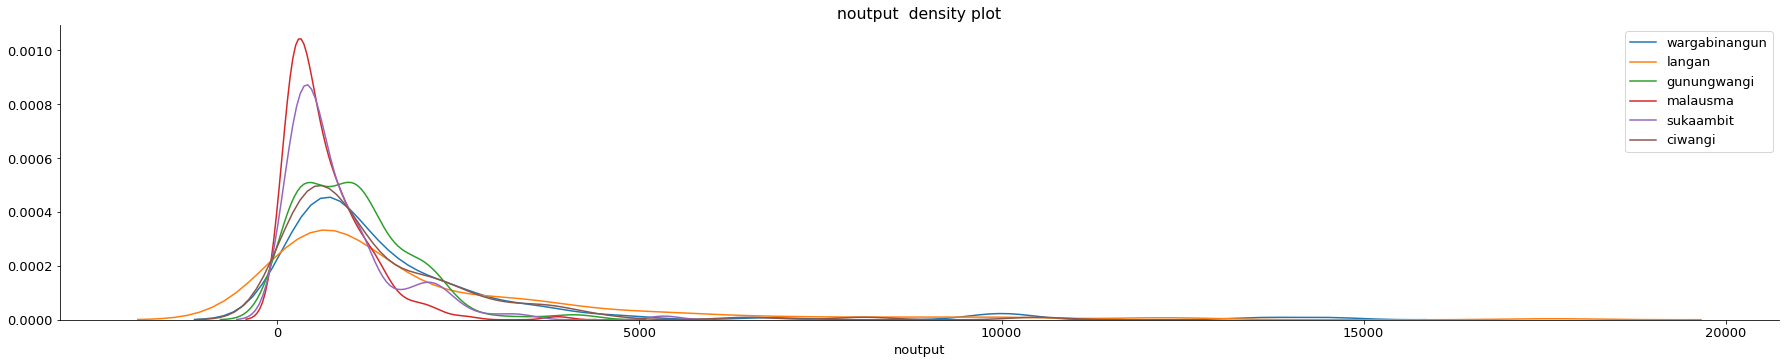



Plot : num_14   price


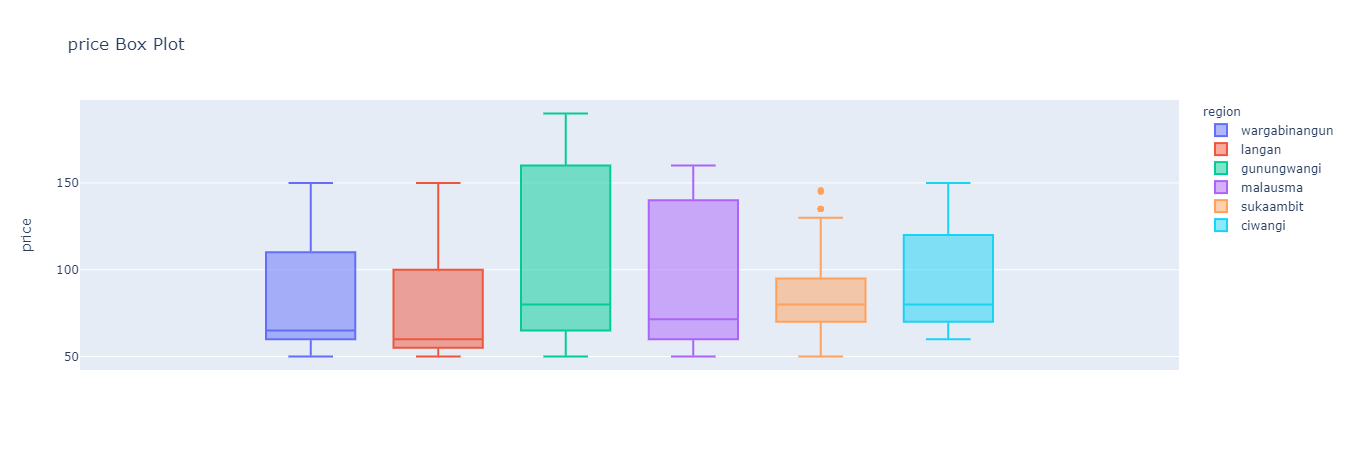

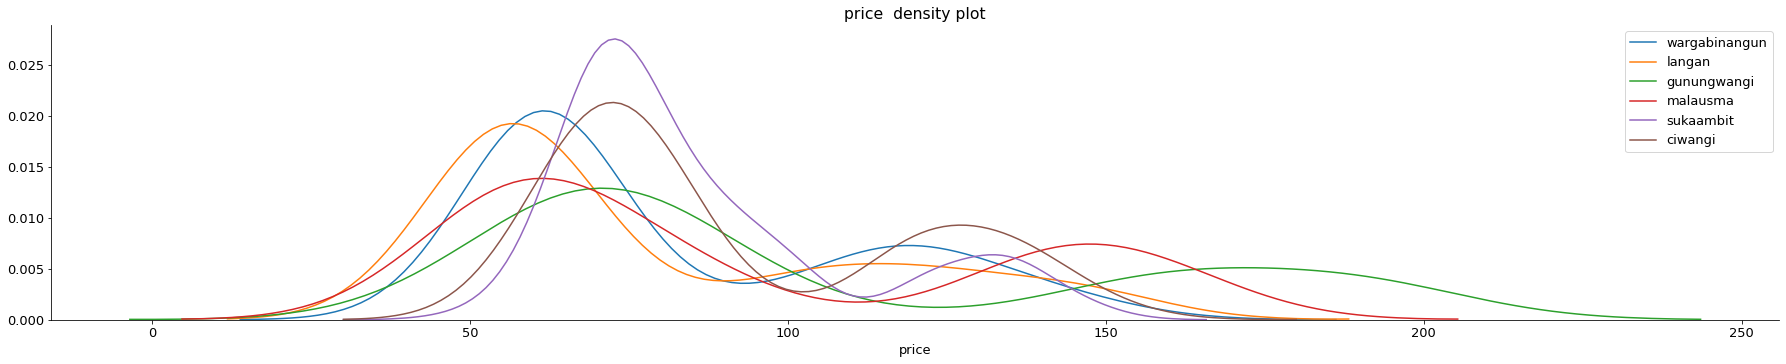



Plot : num_15   gross_op_per_hectare


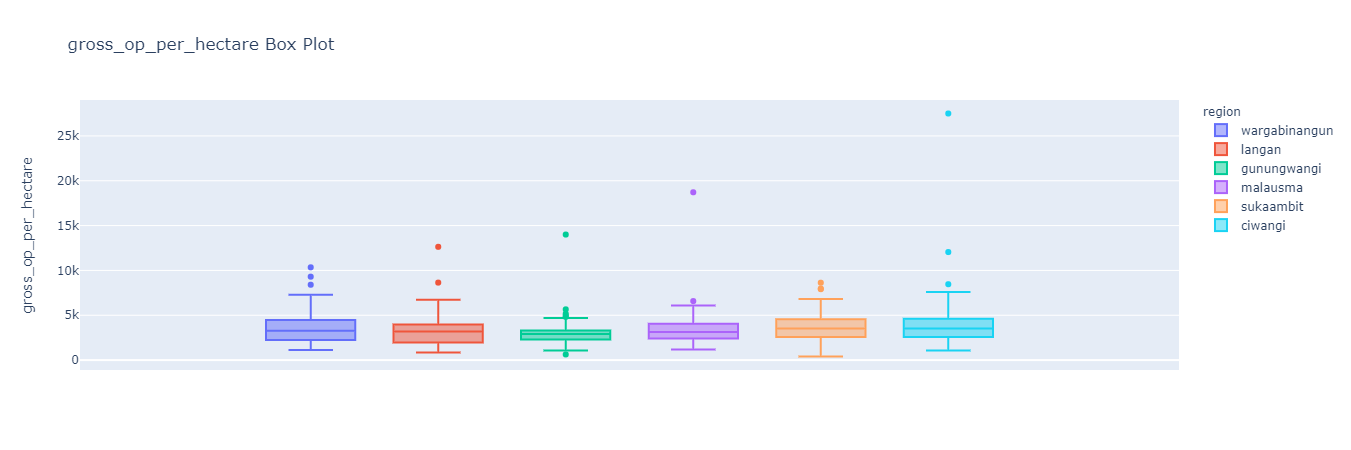

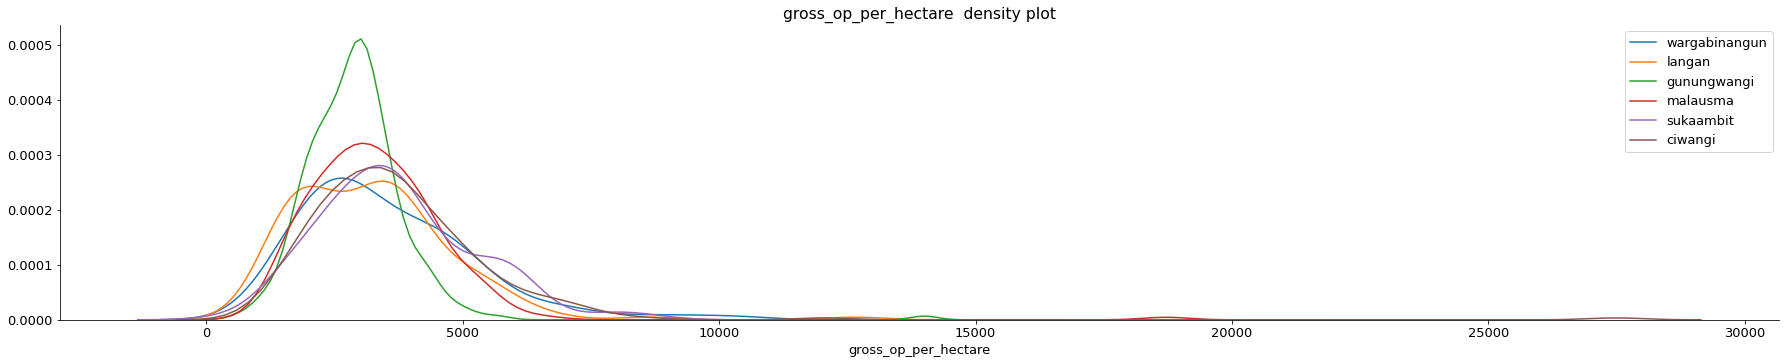



Plot : num_16   spending_on_raw_materials


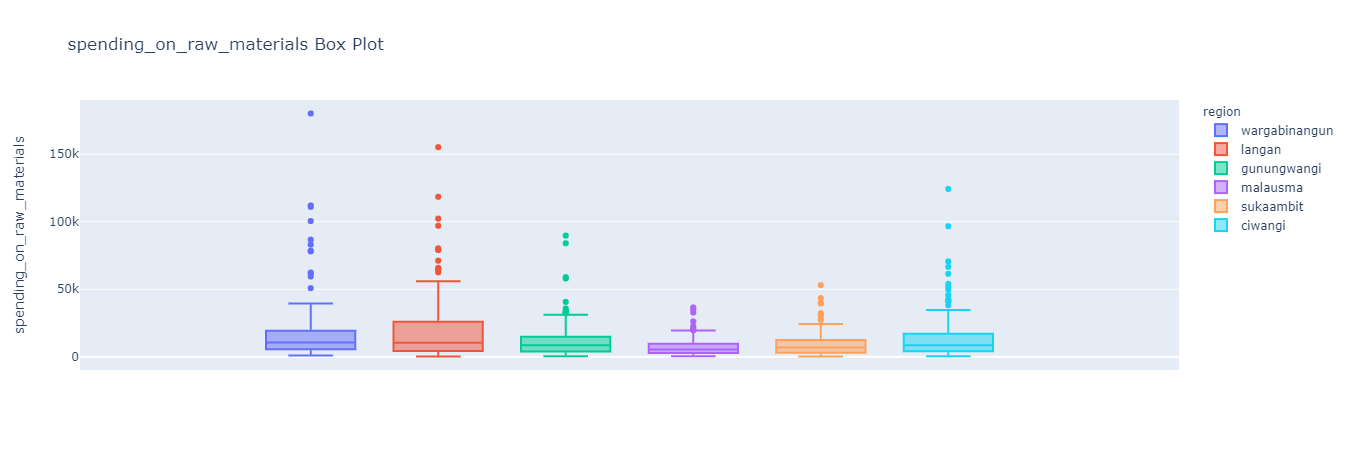

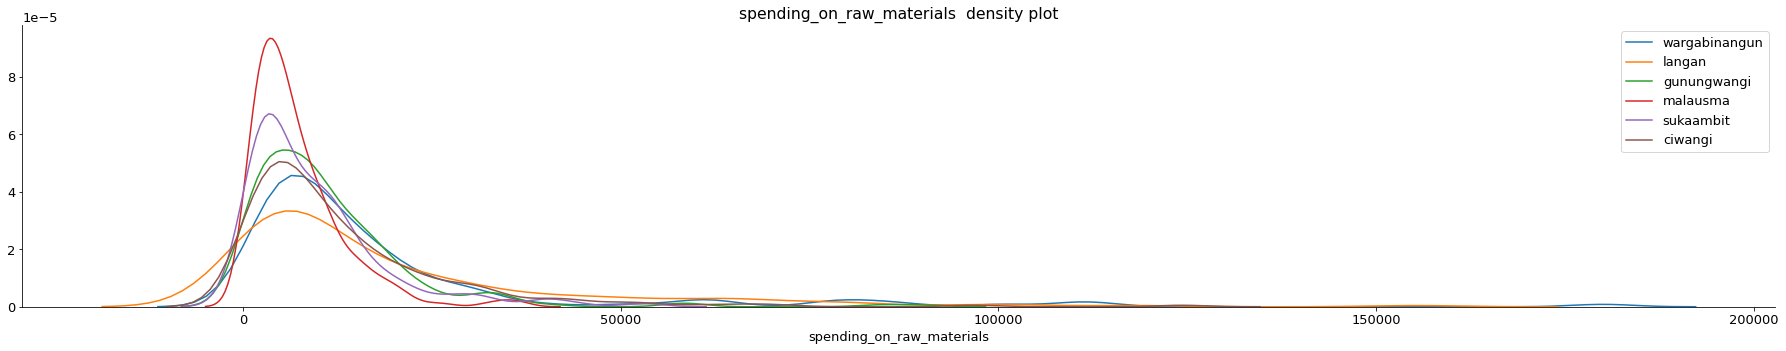



Plot : num_17   spending_per_hectare


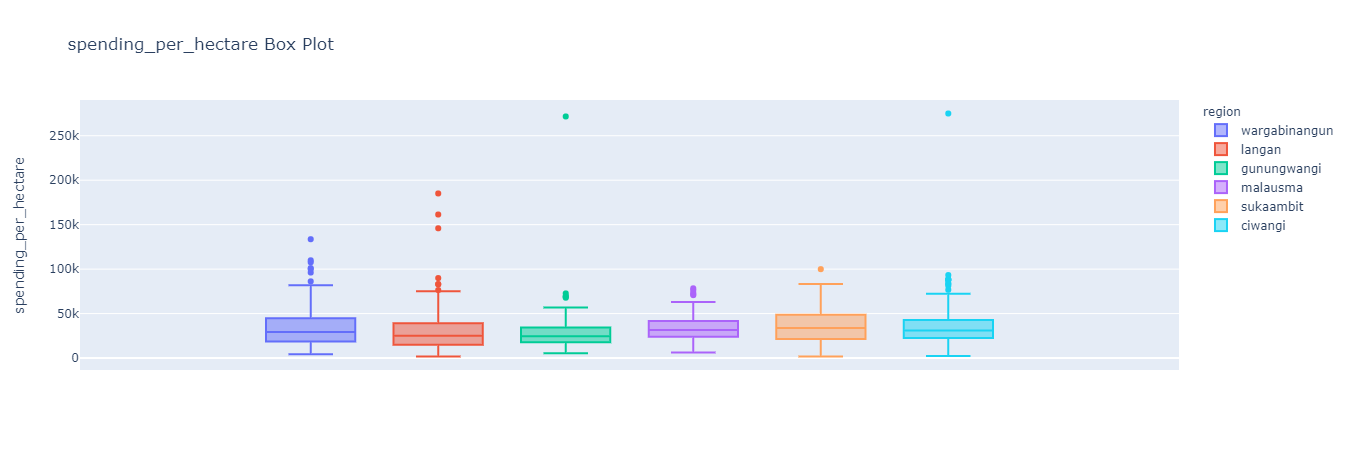

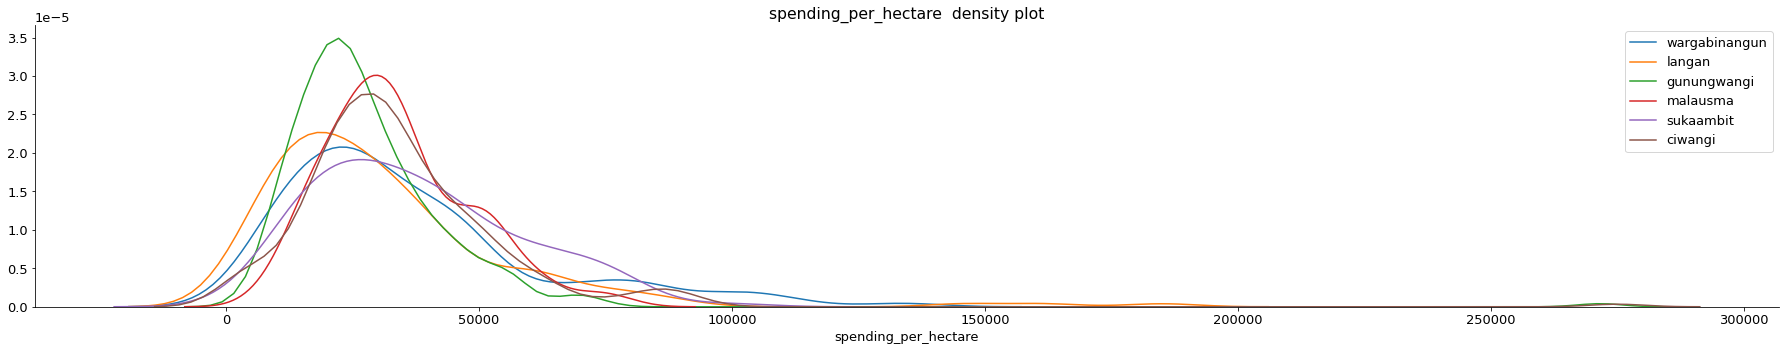



Plot : cat_0   status


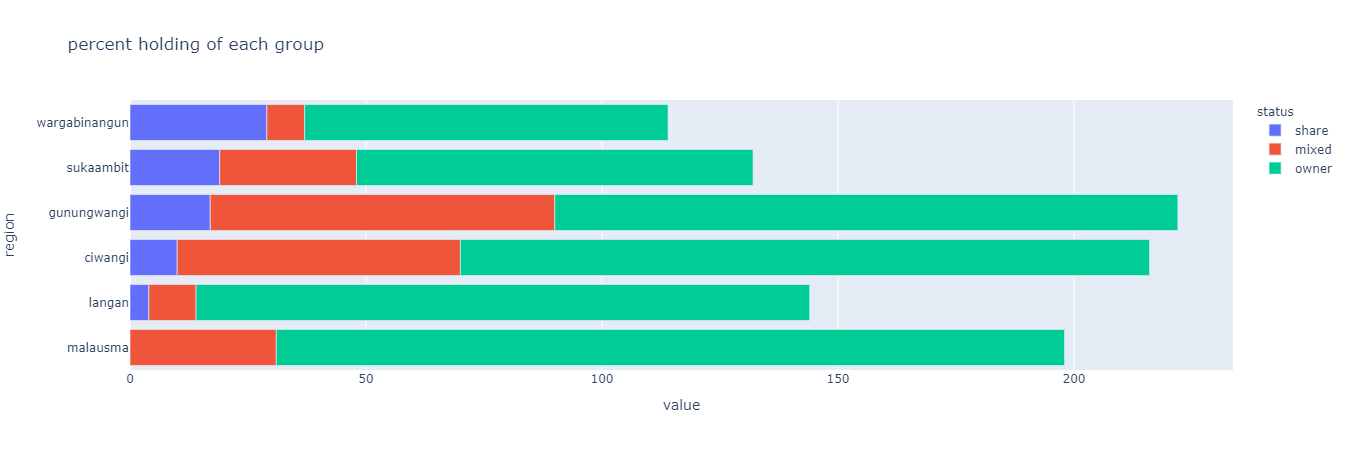



Plot : cat_1   varieties


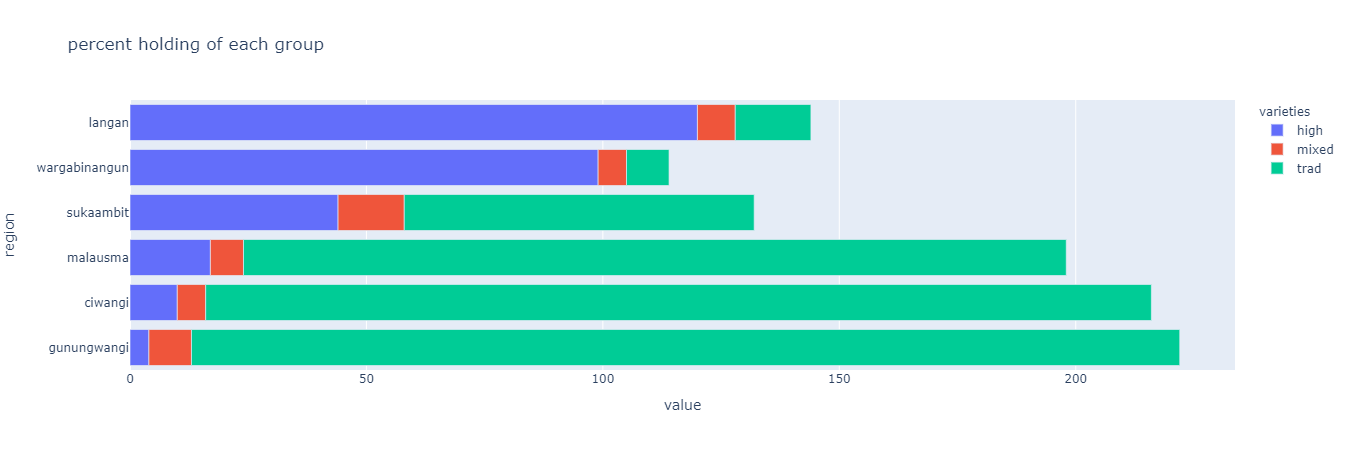



Plot : cat_2   bimas


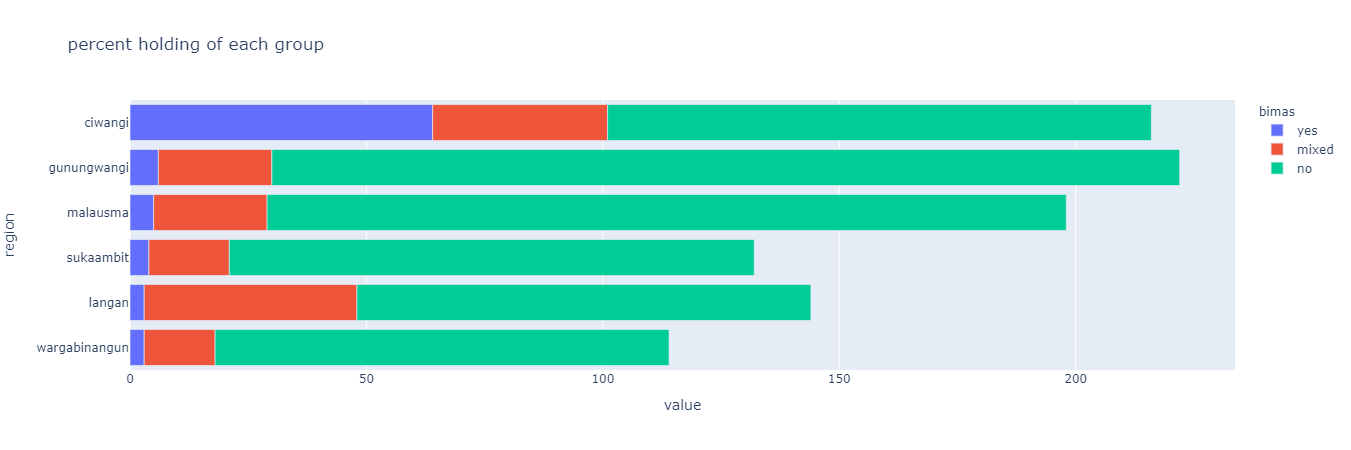

In [99]:
# Bivariate Analysis Region Vs all columns:

catrgorical_cols = data.select_dtypes('object').columns
numerical_cols = data.select_dtypes('float').columns

for i,col in enumerate(numerical_cols):
    print('Plot :','num_'+str(i),' ',col)
    
    fig = px.box(data, y = col,color = 'region', title= col+' Box Plot')
    fig.show()
      
    
    g = sns.FacetGrid(data, hue='region', aspect=5,height=5)
    pl = g.map(sns.distplot, col ,  hist=False, rug=False)
    plt.title(col+'  density plot')
    plt.legend()
    plt.show()
    
    print('')
    print('')
    

for i,col in enumerate(catrgorical_cols):
    
    if col != 'region':
        print('Plot :','cat_'+str(i),' ',col)
        df = pd.crosstab(index=data['region'], columns= data[col]).reset_index()
        df_ = pd.melt(df,id_vars='region').sort_values(by = 'value')

        fig = px.bar(data_frame=df_, y='region' , x='value',color=col, title= 'percent holding of each group')
        fig.show()
        
#         other ways of plotting categorical vs categorical:
#         from statsmodels.graphics.mosaicplot import mosaic
#         mosaic(data, [col, 'region'],);
        
#         sns.countplot(data=data, x = 'region',hue = col)

        print('')
        print('')

> Bi-Variate Analysis
* Region vs Categorical Columns
 1. In Gunungwangi,Malausma, Ciwangi regions traditional varieties crops are preferred but in Wargabinangun and Langan regions high varieties crops are preferred. (ref plot : cat_1)
 2. The percent of people showing interest in Bimas is more in Ciwangi region than other regions.But majority of people in all regions are not showing interest in Bimas.(ref plot : cat_2)
 3. In all the regions majority of the crops are owned or leased, in Gunungwangi and Ciwangi regions shared & owned(mixed) crops are more likely than other regions. (ref plot : cat_0)


* Region vs Numerical Columns
 - Price and Region (ref plot : num_14)
     1.  Multi-Modal distribution :  the distribution of data is slightly different from each region.
     2.  All region prices are right-skewed : In every region, there are some extreme price values.
     3.  In Gunungwangi, Sukaambit, Ciwangi regions median = 80 : half of the sales are less than 80 Rupiah per kg.
     4.  In Wargabinangun and Langan regions median <= 65 : the median price from these two regions is less compared to other regions.
     5.  Price from Gunungwangi and Malausma regions have wide spread after second quartile(50%)
  
  - Gross output per hectare (ref plot : num_15)
     1.  

From the Above plots we can infer that:
> Price vs Region 
   1.  Multi-Modal distribution : the peaks are different for each region.
   2.  All region prices are right-skewed : In every region, there are some extreme price values.
   3.  In Gunungwangi, Sukaambit, Ciwangi regions median = 80 : half of the sales are less than 80 Rupiah per kg.
   4.  In Wargabinangun and Langan regions median <= 65 : the median price from these two regions is less compared to other regions.
   5.  Rice from Gunungwangi and Malausma regions have wide spread after second quartile(50%)

In [ ]:
btn = widgets.Button(description='Medium')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)